In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 500
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/RahinUlde/DataSets/refs/heads/main/Heart_disease.csv')
df

age   sex               cp  trestbps  chol    fbs           restecg  \
0     63  Male   typical angina       145   233   True    lv hypertrophy   
1     41  Male  atypical angina       135   203  False            normal   
2     57  Male     asymptomatic       140   192  False            normal   
3     52  Male   typical angina       118   186  False    lv hypertrophy   
4     57  Male     asymptomatic       110   201  False            normal   
..   ...   ...              ...       ...   ...    ...               ...   
903   53  Male     asymptomatic       125     0  False            normal   
904   62  Male     asymptomatic       166   170  False  st-t abnormality   
905   56  Male      non-anginal       170     0  False    lv hypertrophy   
906   56  Male      non-anginal       144   208   True  st-t abnormality   
907   57  Male     asymptomatic       142   277   True  st-t abnormality   

     thalch  exang  oldpeak        slope               thal  num  
0       150  FALSE      2.3  downsloping       fixed defect    0  
1       132  FALSE      0.0         flat       fixed defect    0  
2       148  FALSE      0.4         flat       fixed defect    0  
3       190  FALSE      0.0         flat       fixed defect    0  
4       126   TRUE      1.5         flat       fixed defect    0  
..      ...    ...      ...          ...                ...  ...  
903     120  FALSE      1.5    upsloping  reversable defect    4  
904     120   TRUE      3.0         flat  reversable defect    4  
905     123   TRUE      2.5  downsloping       fixed defect    4  
906     105   TURE      NaN  downsloping  reversable defect    4  
907     182  FALSE      NaN         flat       fixed defect    4  

[908 rows x 13 columns]

In [3]:
#renaming columns
df = df.rename(columns={
    'cp': 'ChestPainType',
    'trestbps': 'RestingBP',
    'chol': 'Cholesterol',
    'fbs': 'FastingBloodSugar',
    'restecg': 'RestingECG',
    'thalch': 'MaxHeartRate',
    'exang': 'ExerciseAngina',
    'oldpeak': 'ST_Depression',
    'slope': 'SlopeOfST',
    'thal': 'Thalassemia',
    'num': 'HeartDisease'
})

In [4]:
df.head()

age   sex    ChestPainType  RestingBP  Cholesterol  FastingBloodSugar  \
0   63  Male   typical angina        145          233               True   
1   41  Male  atypical angina        135          203              False   
2   57  Male     asymptomatic        140          192              False   
3   52  Male   typical angina        118          186              False   
4   57  Male     asymptomatic        110          201              False   

       RestingECG  MaxHeartRate ExerciseAngina  ST_Depression    SlopeOfST  \
0  lv hypertrophy           150          FALSE            2.3  downsloping   
1          normal           132          FALSE            0.0         flat   
2          normal           148          FALSE            0.4         flat   
3  lv hypertrophy           190          FALSE            0.0         flat   
4          normal           126           TRUE            1.5         flat   

    Thalassemia  HeartDisease  
0  fixed defect             0  
1  fixed defect             0  
2  fixed defect             0  
3  fixed defect             0  
4  fixed defect             0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                908 non-null    int64  
 1   sex                908 non-null    object 
 2   ChestPainType      908 non-null    object 
 3   RestingBP          908 non-null    int64  
 4   Cholesterol        908 non-null    int64  
 5   FastingBloodSugar  908 non-null    bool   
 6   RestingECG         908 non-null    object 
 7   MaxHeartRate       908 non-null    int64  
 8   ExerciseAngina     908 non-null    object 
 9   ST_Depression      846 non-null    float64
 10  SlopeOfST          908 non-null    object 
 11  Thalassemia        908 non-null    object 
 12  HeartDisease       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [6]:
df.dtypes

age                    int64
sex                   object
ChestPainType         object
RestingBP              int64
Cholesterol            int64
FastingBloodSugar       bool
RestingECG            object
MaxHeartRate           int64
ExerciseAngina        object
ST_Depression        float64
SlopeOfST             object
Thalassemia           object
HeartDisease           int64
dtype: object

In [7]:
df.isnull().sum()

age                   0
sex                   0
ChestPainType         0
RestingBP             0
Cholesterol           0
FastingBloodSugar     0
RestingECG            0
MaxHeartRate          0
ExerciseAngina        0
ST_Depression        62
SlopeOfST             0
Thalassemia           0
HeartDisease          0
dtype: int64

In [8]:
df['HeartDisease'].value_counts()

0    399
1    265
2    109
3    107
4     28
Name: HeartDisease, dtype: int64

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'RestingBP'}>],
       [<Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'MaxHeartRate'}>],
       [<Axes: title={'center': 'ST_Depression'}>,
        <Axes: title={'center': 'HeartDisease'}>]], dtype=object)

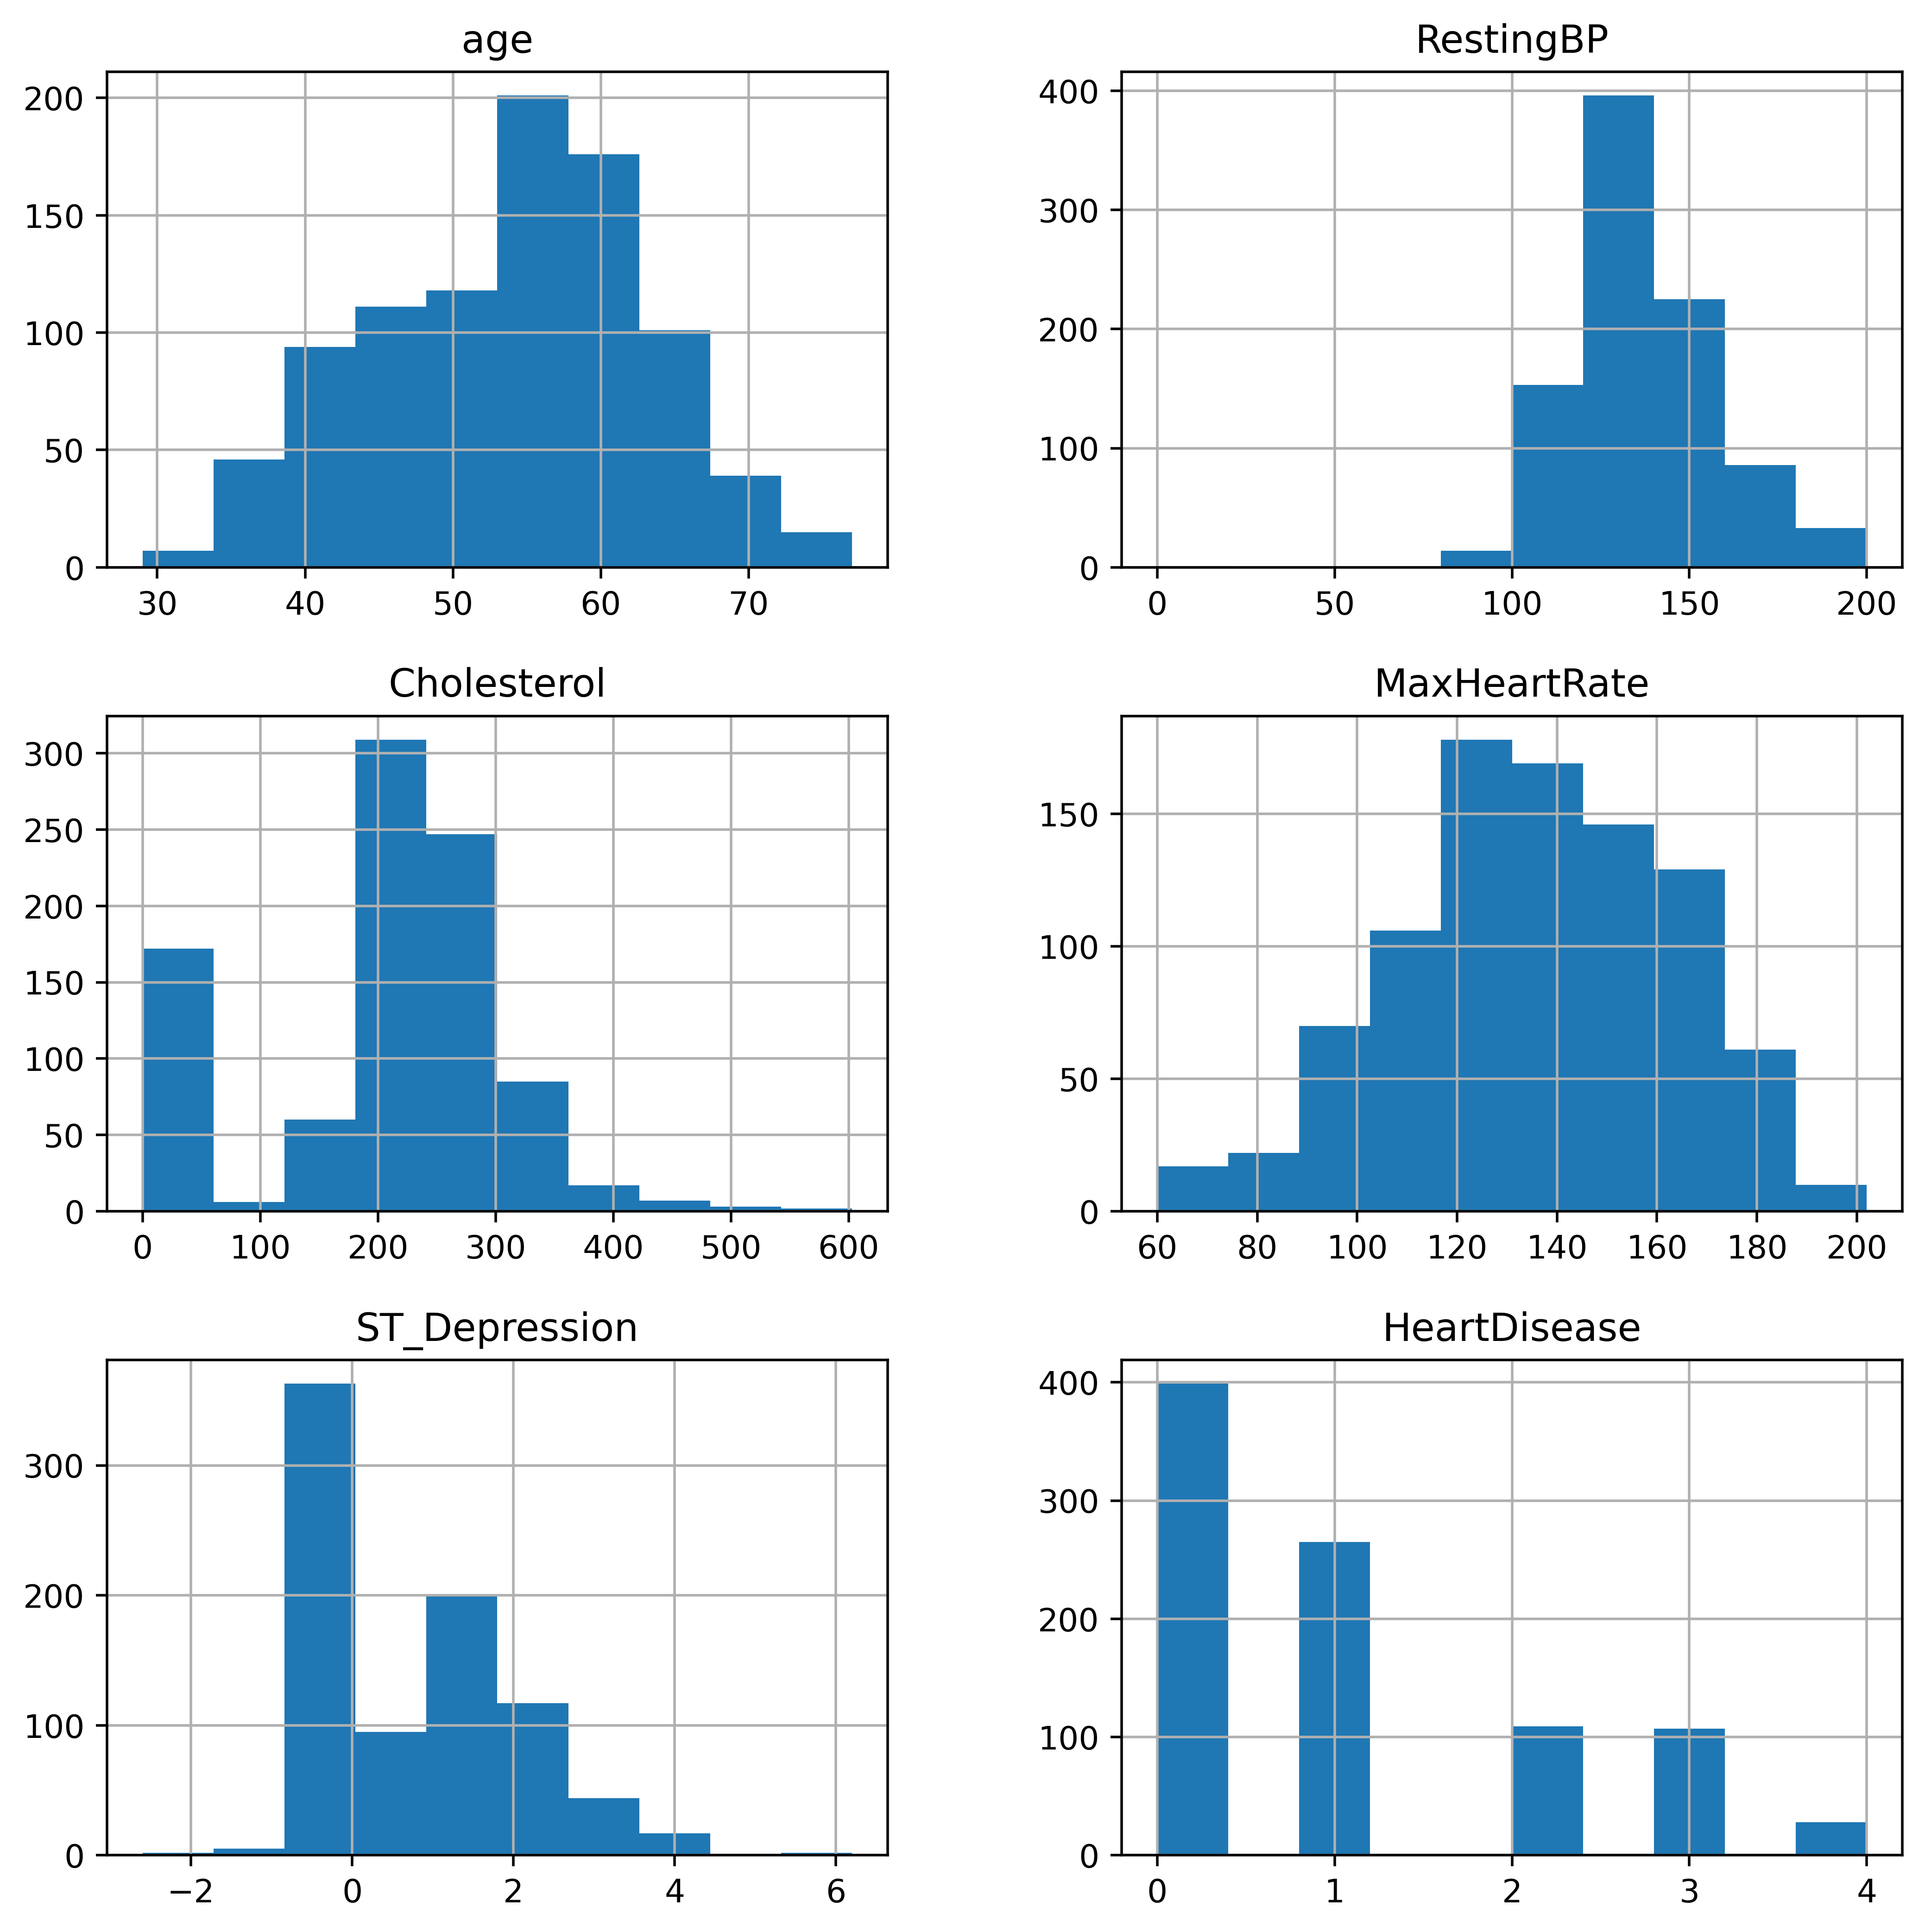

In [9]:
df.hist()

<Axes: >

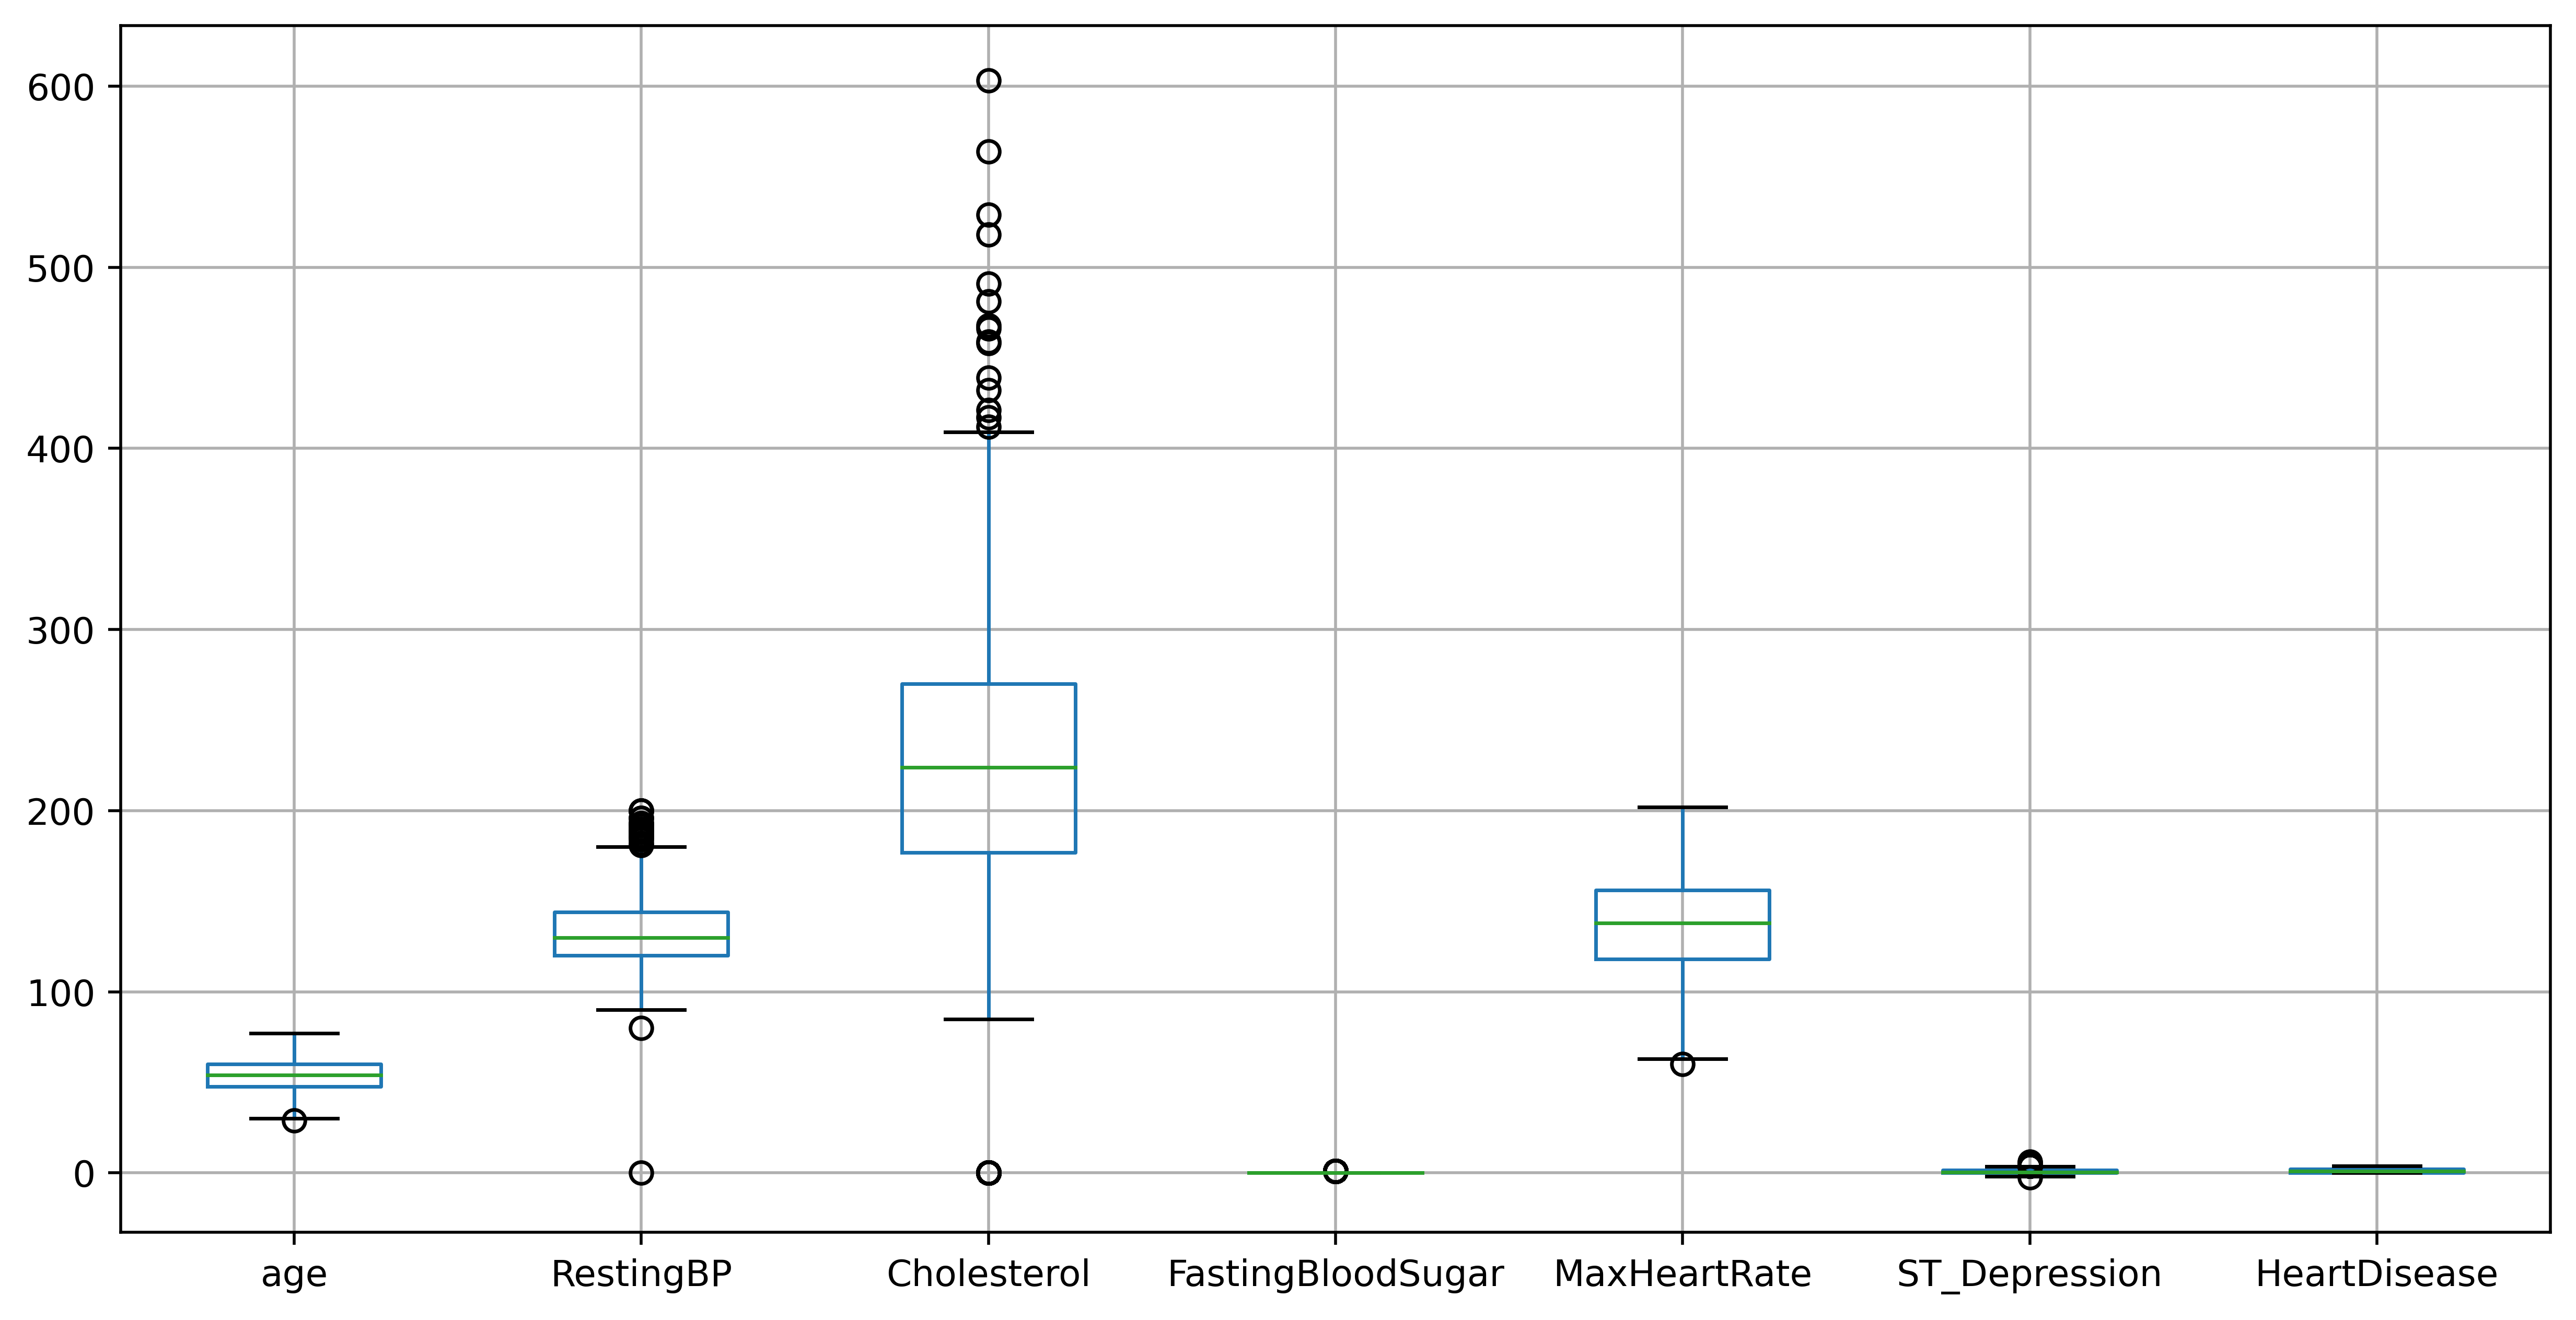

In [10]:
df.boxplot(figsize=(12, 6))

In [11]:
print(df['Cholesterol'].min())
print(df['Cholesterol'].max())

0
603


In [12]:
#Outlier detection function
def outlier_detection(data,colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr = q3-q1
    
    upper = q3+(1.5*iqr)
    lower = q1-(1.5*iqr)
    
    return lower,upper
print(outlier_detection(df,'Cholesterol'))

(36.875, 409.875)


In [13]:
df[df['Cholesterol'] > 409.875]

age     sex    ChestPainType  RestingBP  Cholesterol  FastingBloodSugar  \
74    65  Female      non-anginal        140          417               True   
147   43  Female      non-anginal        150          439              False   
157   67  Female      non-anginal        115          564              False   
187   58    Male     asymptomatic        132          458               True   
247   45    Male      non-anginal        135          481              False   
251   56    Male      non-anginal        130          459              False   
261   39    Male  atypical angina        130          432              False   
266   53  Female  atypical angina        113          468               True   
355   44    Male     asymptomatic        150          412              False   
369   45  Female  atypical angina        180          421              False   
405   40    Male     asymptomatic        120          466               True   
570   54    Male     asymptomatic        130          603               True   
626   53    Male      non-anginal        145          518              False   
627   32    Male     asymptomatic        118          529              False   
628   44    Male     asymptomatic        135          491              False   

         RestingECG  MaxHeartRate ExerciseAngina  ST_Depression    SlopeOfST  \
74   lv hypertrophy           157          FALSE            0.8    upsloping   
147          normal           175          FALSE            0.0    upsloping   
157  lv hypertrophy           160          FALSE            1.6         flat   
187          normal            69          FALSE            1.0  downsloping   
247          normal           110          FALSE            0.0         flat   
251          normal           114          FALSE            0.0    upsloping   
261          normal           120          FALSE            0.0         flat   
266          normal           127          FALSE            0.0         flat   
355          normal           170          FALSE            0.0         flat   
369          normal           180          FALSE            0.0    upsloping   
405          normal           152           TRUE            1.0         flat   
570          normal           125           TRUE            1.0         flat   
626          normal           130          FALSE            0.0  downsloping   
627          normal           130          FALSE            0.0    upsloping   
628          normal           135          FALSE            0.0    upsloping   

           Thalassemia  HeartDisease  
74              normal             0  
147             normal             0  
157  reversable defect             0  
187  reversable defect             0  
247             normal             0  
251             normal             0  
261             normal             0  
266             normal             0  
355       fixed defect             0  
369  reversable defect             0  
405       fixed defect             1  
570  reversable defect             1  
626       fixed defect             1  
627       fixed defect             1  
628       fixed defect             1

In [14]:
#Capping Outliers
df.loc[df['Cholesterol'] > 409.875,'Cholesterol'] = 409.875

In [15]:
outlier_detection(df,'RestingBP')

(84.0, 180.0)

In [16]:
df.loc[df['RestingBP'] > 180.0,'RestingBP'] = 180.0

<Axes: >

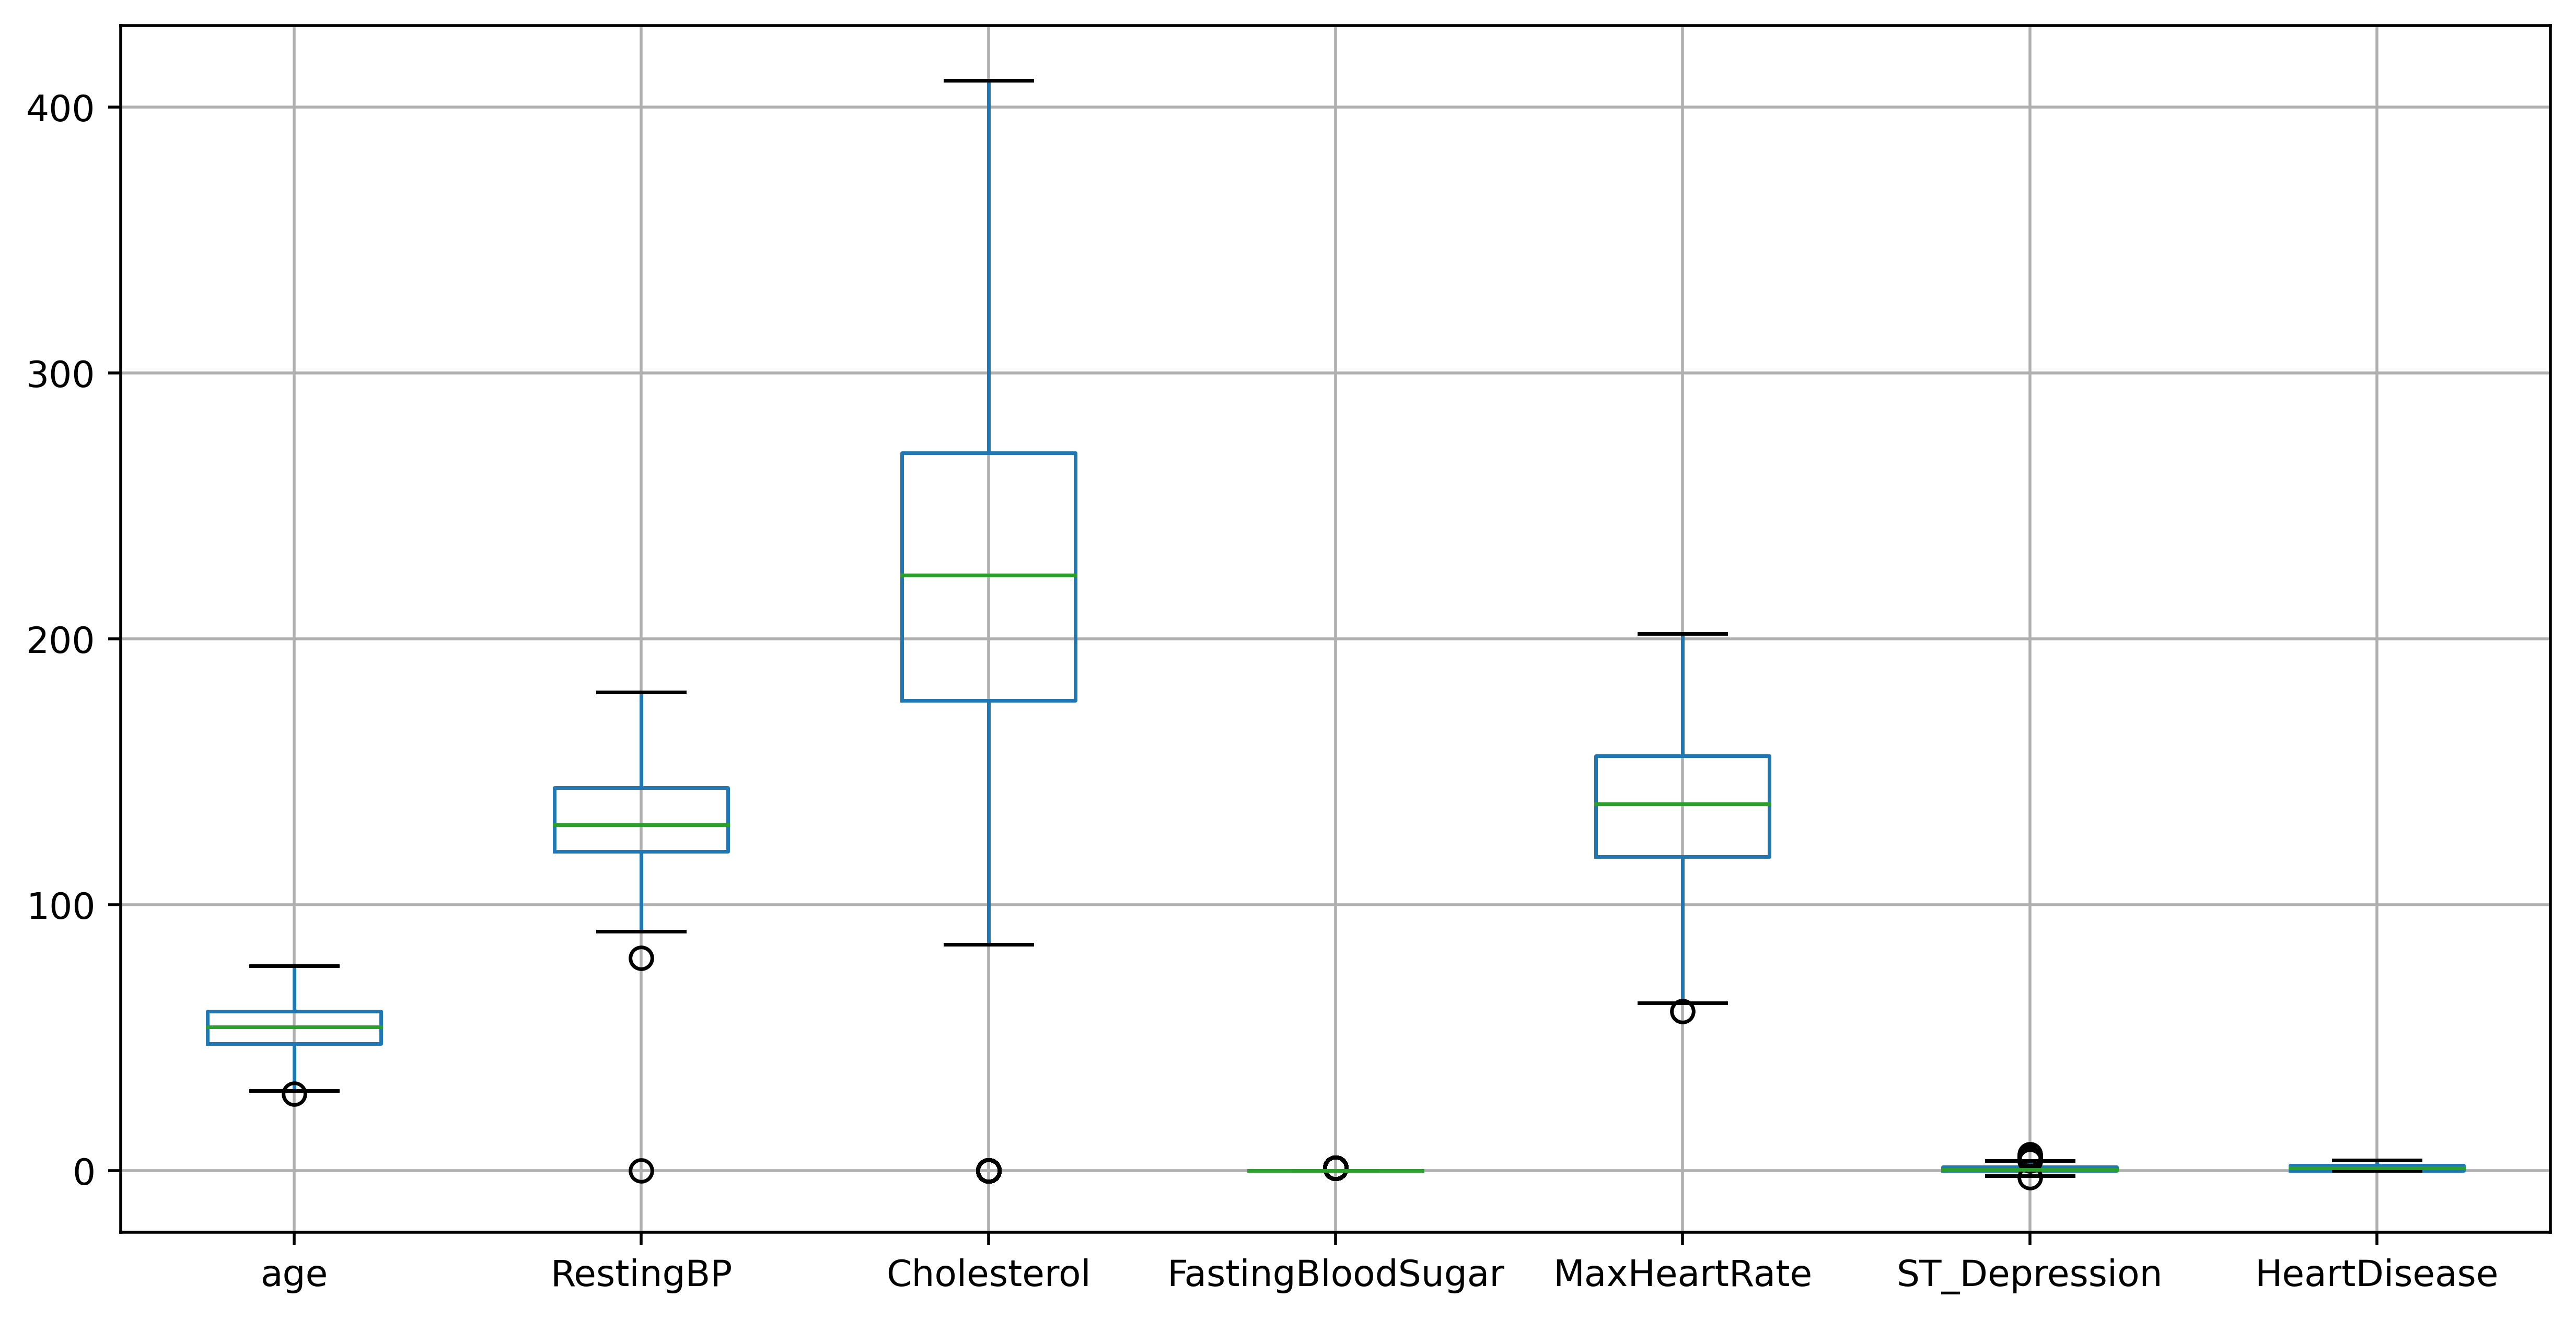

In [17]:
df.boxplot(figsize=(12, 6))

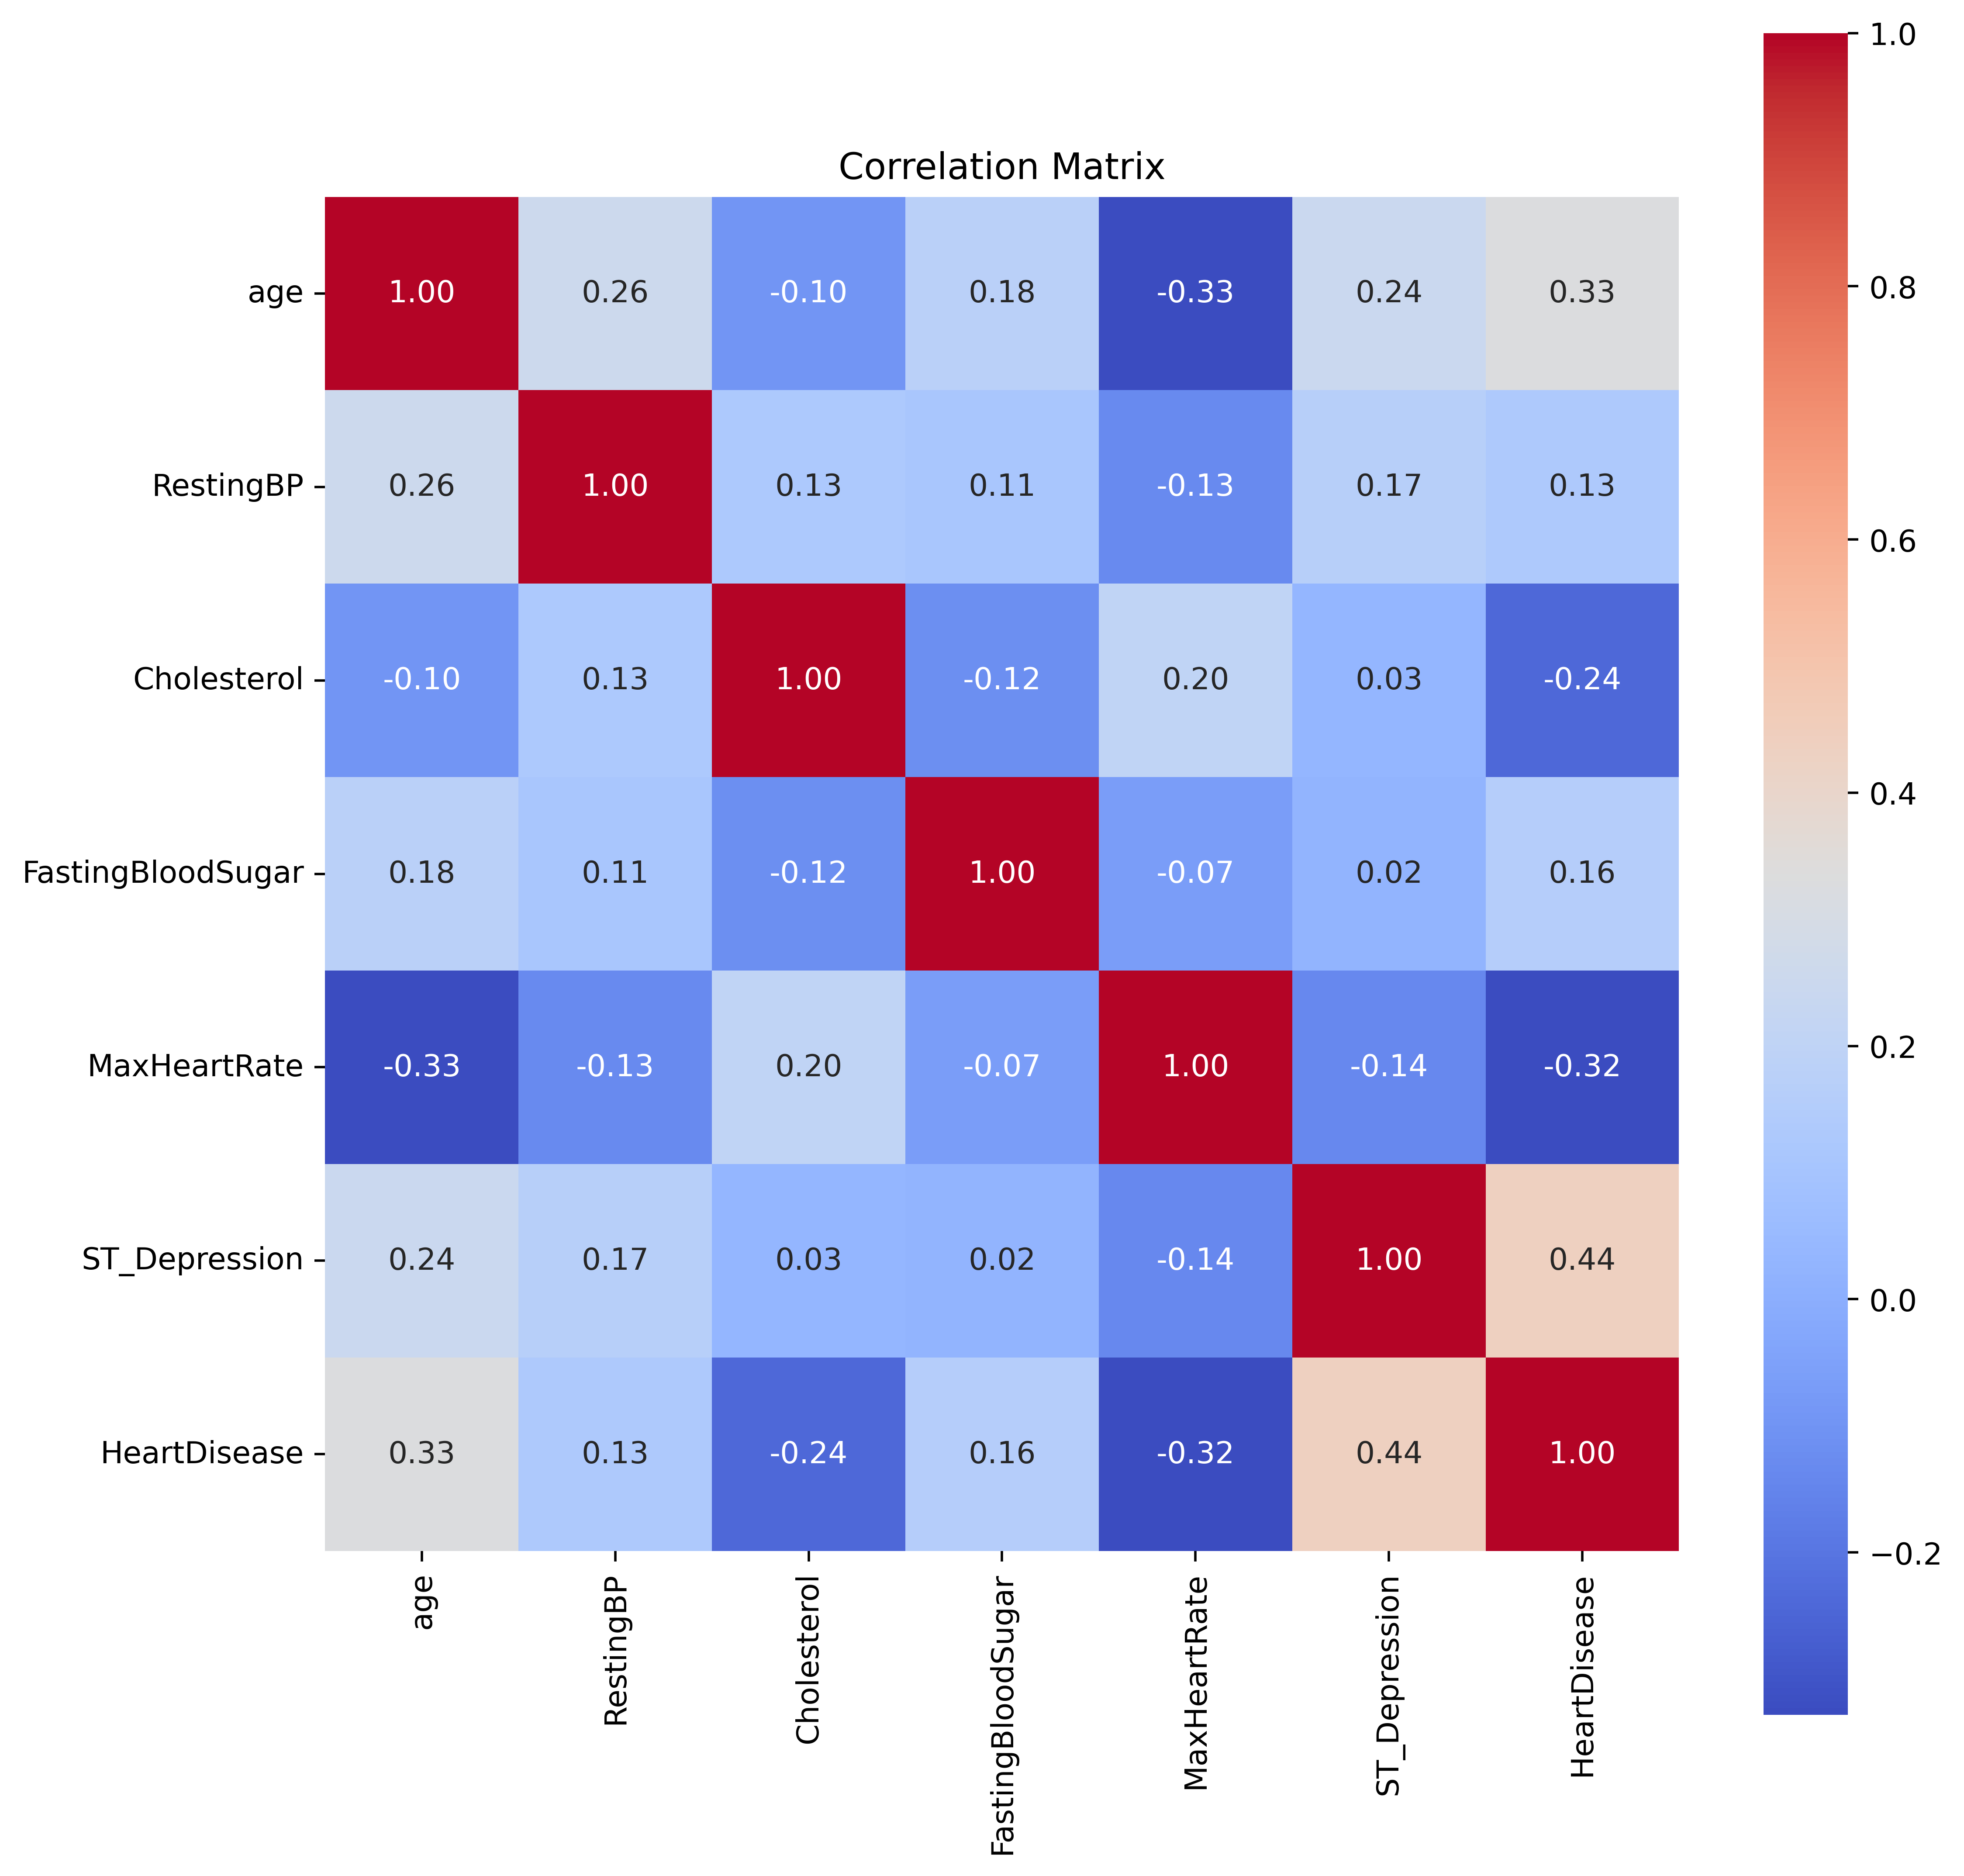

In [18]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()

In [19]:
df.head()

age   sex    ChestPainType  RestingBP  Cholesterol  FastingBloodSugar  \
0   63  Male   typical angina        145        233.0               True   
1   41  Male  atypical angina        135        203.0              False   
2   57  Male     asymptomatic        140        192.0              False   
3   52  Male   typical angina        118        186.0              False   
4   57  Male     asymptomatic        110        201.0              False   

       RestingECG  MaxHeartRate ExerciseAngina  ST_Depression    SlopeOfST  \
0  lv hypertrophy           150          FALSE            2.3  downsloping   
1          normal           132          FALSE            0.0         flat   
2          normal           148          FALSE            0.4         flat   
3  lv hypertrophy           190          FALSE            0.0         flat   
4          normal           126           TRUE            1.5         flat   

    Thalassemia  HeartDisease  
0  fixed defect             0  
1  fixed defect             0  
2  fixed defect             0  
3  fixed defect             0  
4  fixed defect             0

In [20]:
print(df['ChestPainType'].value_counts())
print(df['RestingECG'].value_counts())
print(df['Thalassemia'].value_counts())
print(df['SlopeOfST'].value_counts())

asymptomatic       495
non-anginal        203
atypical angina    165
typical angina      45
Name: ChestPainType, dtype: int64
normal              542
lv hypertrophy      187
st-t abnormality    179
Name: RestingECG, dtype: int64
reversable defect    365
normal               344
fixed defect         199
Name: Thalassemia, dtype: int64
flat           453
upsloping      298
downsloping    157
Name: SlopeOfST, dtype: int64


In [22]:
df.isna().sum()

age                   0
sex                   0
ChestPainType         0
RestingBP             0
Cholesterol           0
FastingBloodSugar     0
RestingECG            0
MaxHeartRate          0
ExerciseAngina        0
ST_Depression        62
SlopeOfST             0
Thalassemia           0
HeartDisease          0
dtype: int64

In [23]:
df['ST_Depression'] = df['ST_Depression'].fillna(df['ST_Depression'].median())
print(df.isna().sum())

age                  0
sex                  0
ChestPainType        0
RestingBP            0
Cholesterol          0
FastingBloodSugar    0
RestingECG           0
MaxHeartRate         0
ExerciseAngina       0
ST_Depression        0
SlopeOfST            0
Thalassemia          0
HeartDisease         0
dtype: int64


In [24]:
df.head()

age   sex    ChestPainType  RestingBP  Cholesterol  FastingBloodSugar  \
0   63  Male   typical angina        145        233.0               True   
1   41  Male  atypical angina        135        203.0              False   
2   57  Male     asymptomatic        140        192.0              False   
3   52  Male   typical angina        118        186.0              False   
4   57  Male     asymptomatic        110        201.0              False   

       RestingECG  MaxHeartRate ExerciseAngina  ST_Depression    SlopeOfST  \
0  lv hypertrophy           150          FALSE            2.3  downsloping   
1          normal           132          FALSE            0.0         flat   
2          normal           148          FALSE            0.4         flat   
3  lv hypertrophy           190          FALSE            0.0         flat   
4          normal           126           TRUE            1.5         flat   

    Thalassemia  HeartDisease  
0  fixed defect             0  
1  fixed defect             0  
2  fixed defect             0  
3  fixed defect             0  
4  fixed defect             0

In [25]:
df['HeartDisease'].value_counts()

0    399
1    265
2    109
3    107
4     28
Name: HeartDisease, dtype: int64

In [26]:
#model building

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
df_encoded = df.copy()

In [29]:
# Identify categorical columns to encode
categorical_cols = df_encoded.select_dtypes(include='object').columns

In [30]:
# Apply Label Encoding to each
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [31]:
df_encoded.head()

age  sex  ChestPainType  RestingBP  Cholesterol  FastingBloodSugar  \
0   63    1              3        145        233.0               True   
1   41    1              1        135        203.0              False   
2   57    1              0        140        192.0              False   
3   52    1              3        118        186.0              False   
4   57    1              0        110        201.0              False   

   RestingECG  MaxHeartRate  ExerciseAngina  ST_Depression  SlopeOfST  \
0           0           150               0            2.3          0   
1           1           132               0            0.0          1   
2           1           148               0            0.4          1   
3           0           190               0            0.0          1   
4           1           126               1            1.5          1   

   Thalassemia  HeartDisease  
0            0             0  
1            0             0  
2            0             0  
3            0             0  
4            0             0

In [32]:
X = df_encoded.iloc[:,:-1]
y = df_encoded['HeartDisease']

In [33]:
X.head()

age  sex  ChestPainType  RestingBP  Cholesterol  FastingBloodSugar  \
0   63    1              3        145        233.0               True   
1   41    1              1        135        203.0              False   
2   57    1              0        140        192.0              False   
3   52    1              3        118        186.0              False   
4   57    1              0        110        201.0              False   

   RestingECG  MaxHeartRate  ExerciseAngina  ST_Depression  SlopeOfST  \
0           0           150               0            2.3          0   
1           1           132               0            0.0          1   
2           1           148               0            0.4          1   
3           0           190               0            0.0          1   
4           1           126               1            1.5          1   

   Thalassemia  
0            0  
1            0  
2            0  
3            0  
4            0

In [34]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: HeartDisease, dtype: int64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
X_train

age  sex  ChestPainType  RestingBP  Cholesterol  FastingBloodSugar  \
84    42    1              1        120        295.0              False   
10    30    0              3        170        237.0              False   
617   74    1              2        140        237.0               True   
250   41    1              0        104          0.0              False   
869   49    1              2        137        142.0              False   
..   ...  ...            ...        ...          ...                ...   
106   63    0              2        135        252.0              False   
270   37    0              1        120        260.0              False   
860   48    1              0        140        374.0              False   
435   57    1              1        154        232.0              False   
102   60    0              3        150        240.0              False   

     RestingECG  MaxHeartRate  ExerciseAngina  ST_Depression  SlopeOfST  \
84            1           162               0            0.0          2   
10            2           170               0            0.0          0   
617           1            94               0            0.0          2   
250           2           111               0            0.0          1   
869           1            68               0            0.5          1   
..          ...           ...             ...            ...        ...   
106           0           172               0            0.0          2   
270           1           130               0            0.0          0   
860           1           159               1            1.5          2   
435           0           164               0            0.0          2   
102           1           171               0            0.9          2   

     Thalassemia  
84             1  
10             0  
617            1  
250            0  
869            2  
..           ...  
106            1  
270            2  
860            2  
435            1  
102            1  

[726 rows x 12 columns]

In [37]:
y.unique()

array([0, 1, 2, 3, 4], dtype=int64)

# Model 01

#  C5.0

In [38]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [39]:
y_pred = model.predict(X_test)

In [40]:
y_pred

array([1, 1, 0, 1, 0, 2, 0, 0, 1, 2, 3, 1, 0, 0, 0, 2, 1, 3, 0, 2, 0, 0,
       1, 1, 0, 2, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 3, 1, 2, 0, 2, 0, 0, 3, 1, 0, 3, 0, 0, 3, 0, 1, 3,
       2, 0, 0, 1, 0, 3, 3, 4, 0, 0, 1, 0, 3, 1, 3, 0, 1, 0, 0, 0, 0, 2,
       3, 1, 1, 2, 0, 0, 0, 3, 4, 0, 0, 0, 0, 1, 0, 2, 0, 2, 1, 1, 3, 2,
       3, 0, 2, 4, 0, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 4, 1, 1, 0,
       0, 2, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 1, 3,
       1, 1, 1, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 3,
       2, 1, 1, 4, 2, 0], dtype=int64)

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70        89
           1       0.26      0.23      0.24        48
           2       0.23      0.23      0.23        22
           3       0.10      0.12      0.11        17
           4       0.00      0.00      0.00         6

    accuracy                           0.45       182
   macro avg       0.26      0.26      0.26       182
weighted avg       0.44      0.45      0.45       182



In [43]:
confusion_matrix(y_test,y_pred)

array([[64, 16,  2,  6,  1],
       [19, 11, 10,  7,  1],
       [ 3,  8,  5,  4,  2],
       [ 5,  5,  4,  2,  1],
       [ 2,  2,  1,  1,  0]], dtype=int64)

In [44]:
print('Training accuracy: ', model.score(X_train,y_train))
print('Testing Accuracy: ', model.score(X_test,y_test))

Training accuracy:  1.0
Testing Accuracy:  0.45054945054945056


In [45]:
X.columns

Index(['age', 'sex', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'FastingBloodSugar', 'RestingECG', 'MaxHeartRate', 'ExerciseAngina',
       'ST_Depression', 'SlopeOfST', 'Thalassemia'],
      dtype='object')

In [46]:
from sklearn.tree import plot_tree

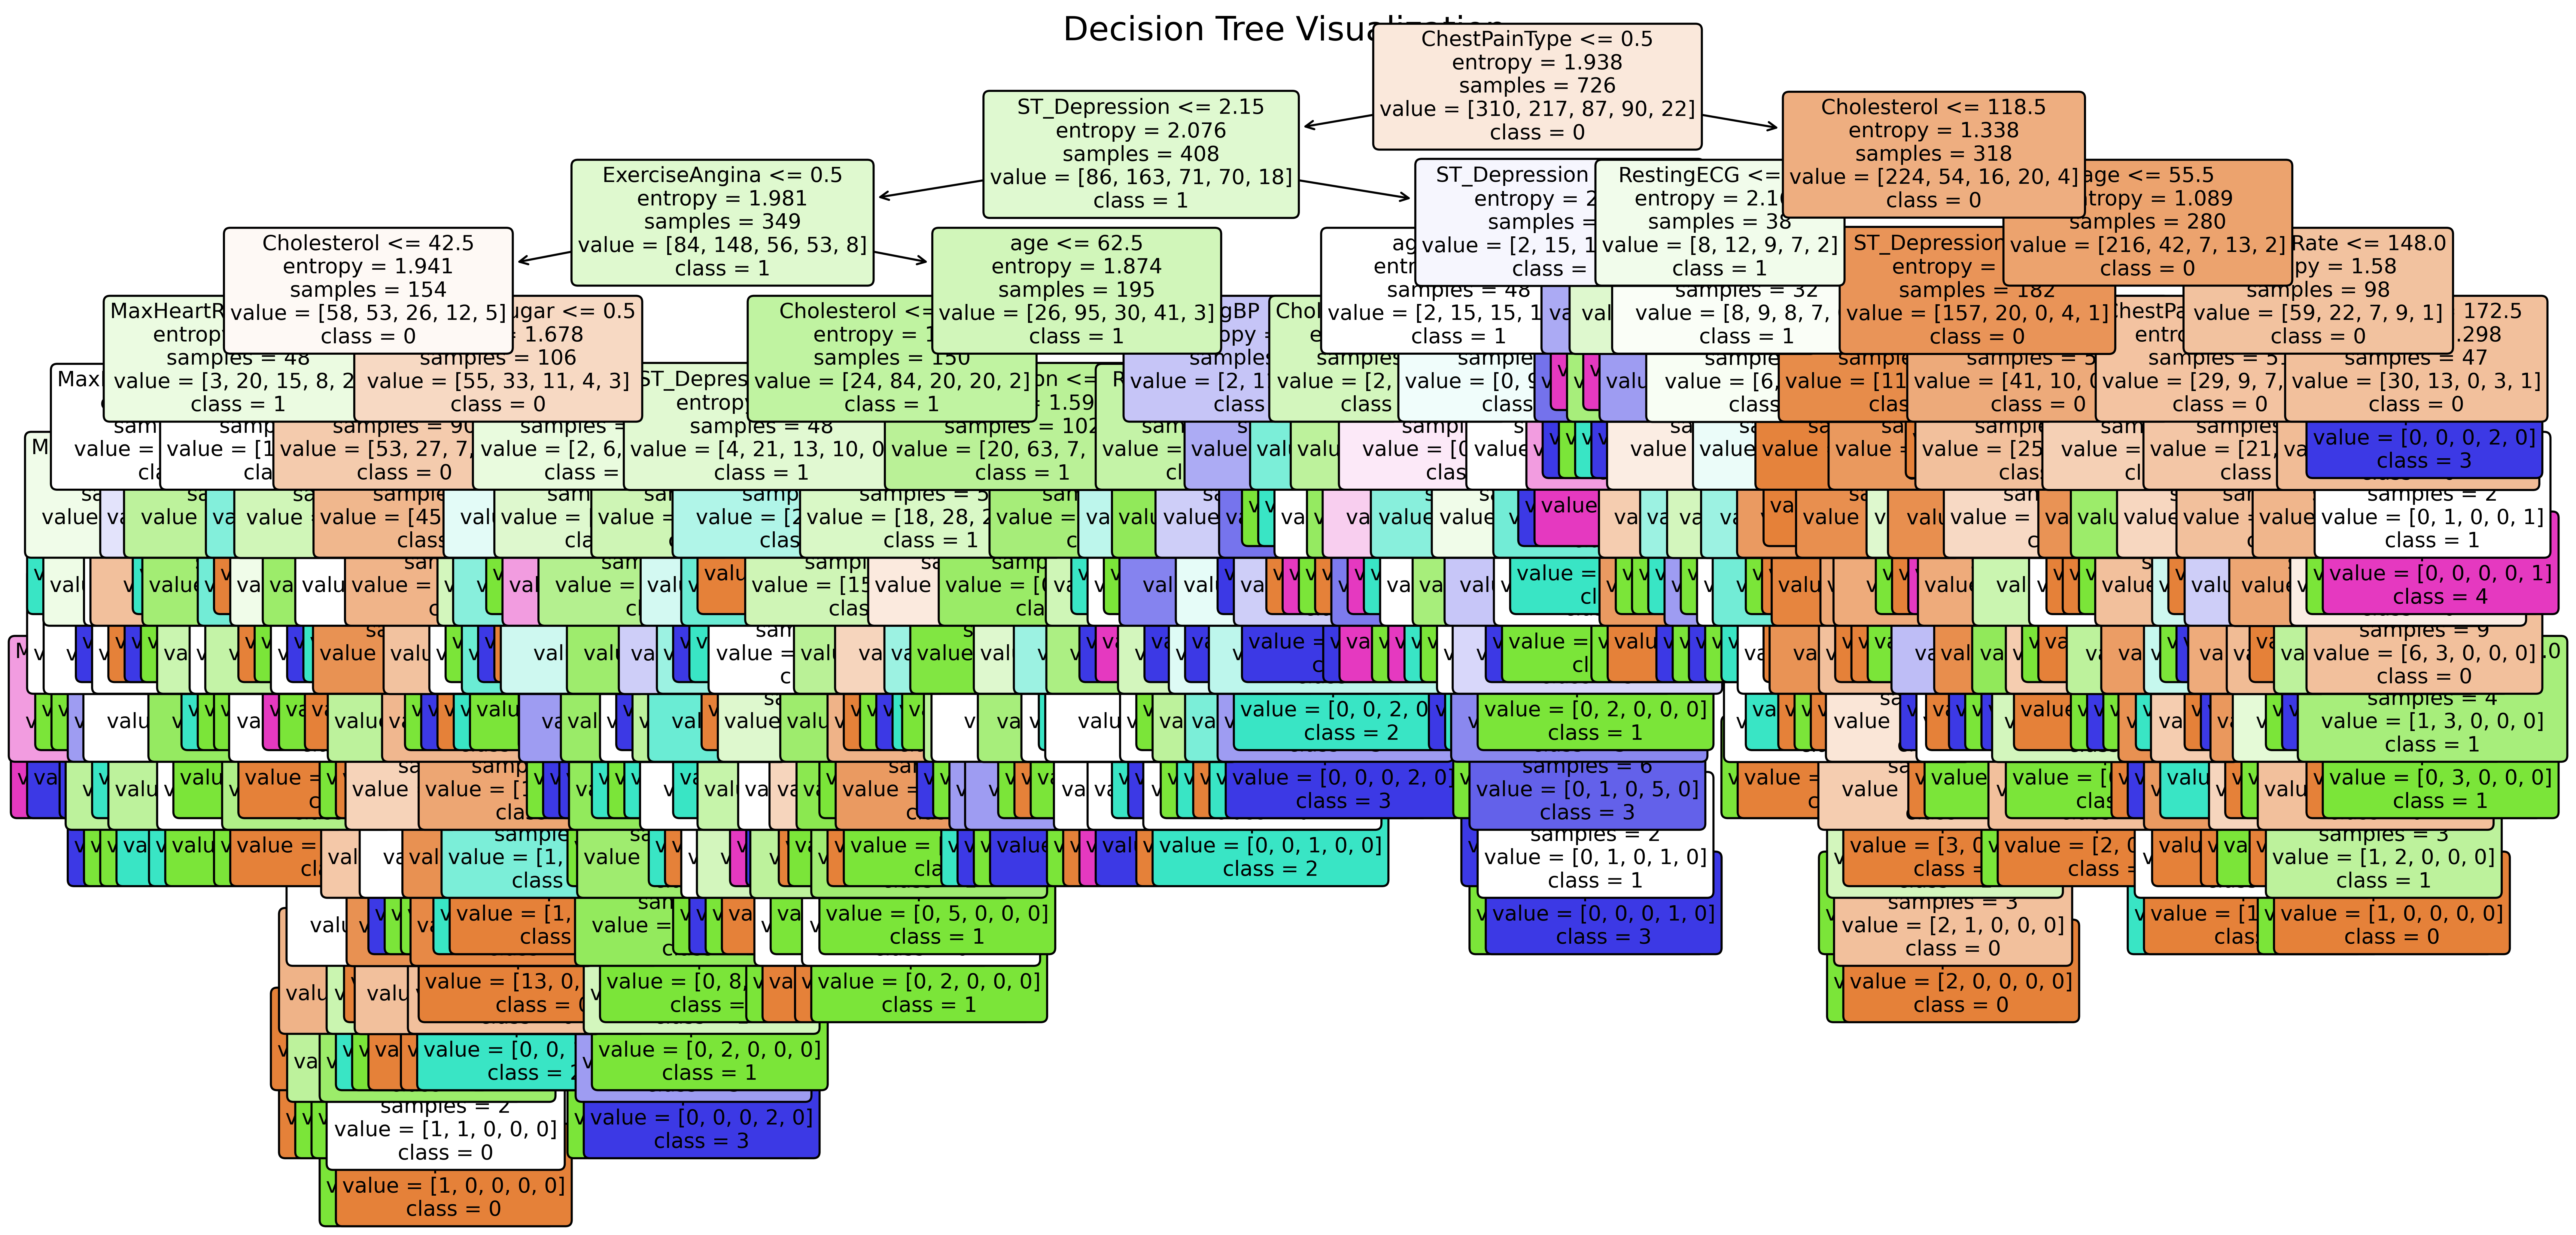

In [47]:
plt.figure(figsize=(20, 10))
plot_tree(model,
          feature_names=X.columns,
          class_names=[str(cls) for cls in model.classes_],  # <- use actual class labels
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()


In [48]:
X.head()

age  sex  ChestPainType  RestingBP  Cholesterol  FastingBloodSugar  \
0   63    1              3        145        233.0               True   
1   41    1              1        135        203.0              False   
2   57    1              0        140        192.0              False   
3   52    1              3        118        186.0              False   
4   57    1              0        110        201.0              False   

   RestingECG  MaxHeartRate  ExerciseAngina  ST_Depression  SlopeOfST  \
0           0           150               0            2.3          0   
1           1           132               0            0.0          1   
2           1           148               0            0.4          1   
3           0           190               0            0.0          1   
4           1           126               1            1.5          1   

   Thalassemia  
0            0  
1            0  
2            0  
3            0  
4            0

In [49]:
model.feature_importances_ 

array([0.15204389, 0.01930455, 0.10866377, 0.10211036, 0.18937151,
       0.02133065, 0.06006844, 0.14225967, 0.02897928, 0.11309904,
       0.0334006 , 0.02936824])

In [50]:
X.columns

Index(['age', 'sex', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'FastingBloodSugar', 'RestingECG', 'MaxHeartRate', 'ExerciseAngina',
       'ST_Depression', 'SlopeOfST', 'Thalassemia'],
      dtype='object')

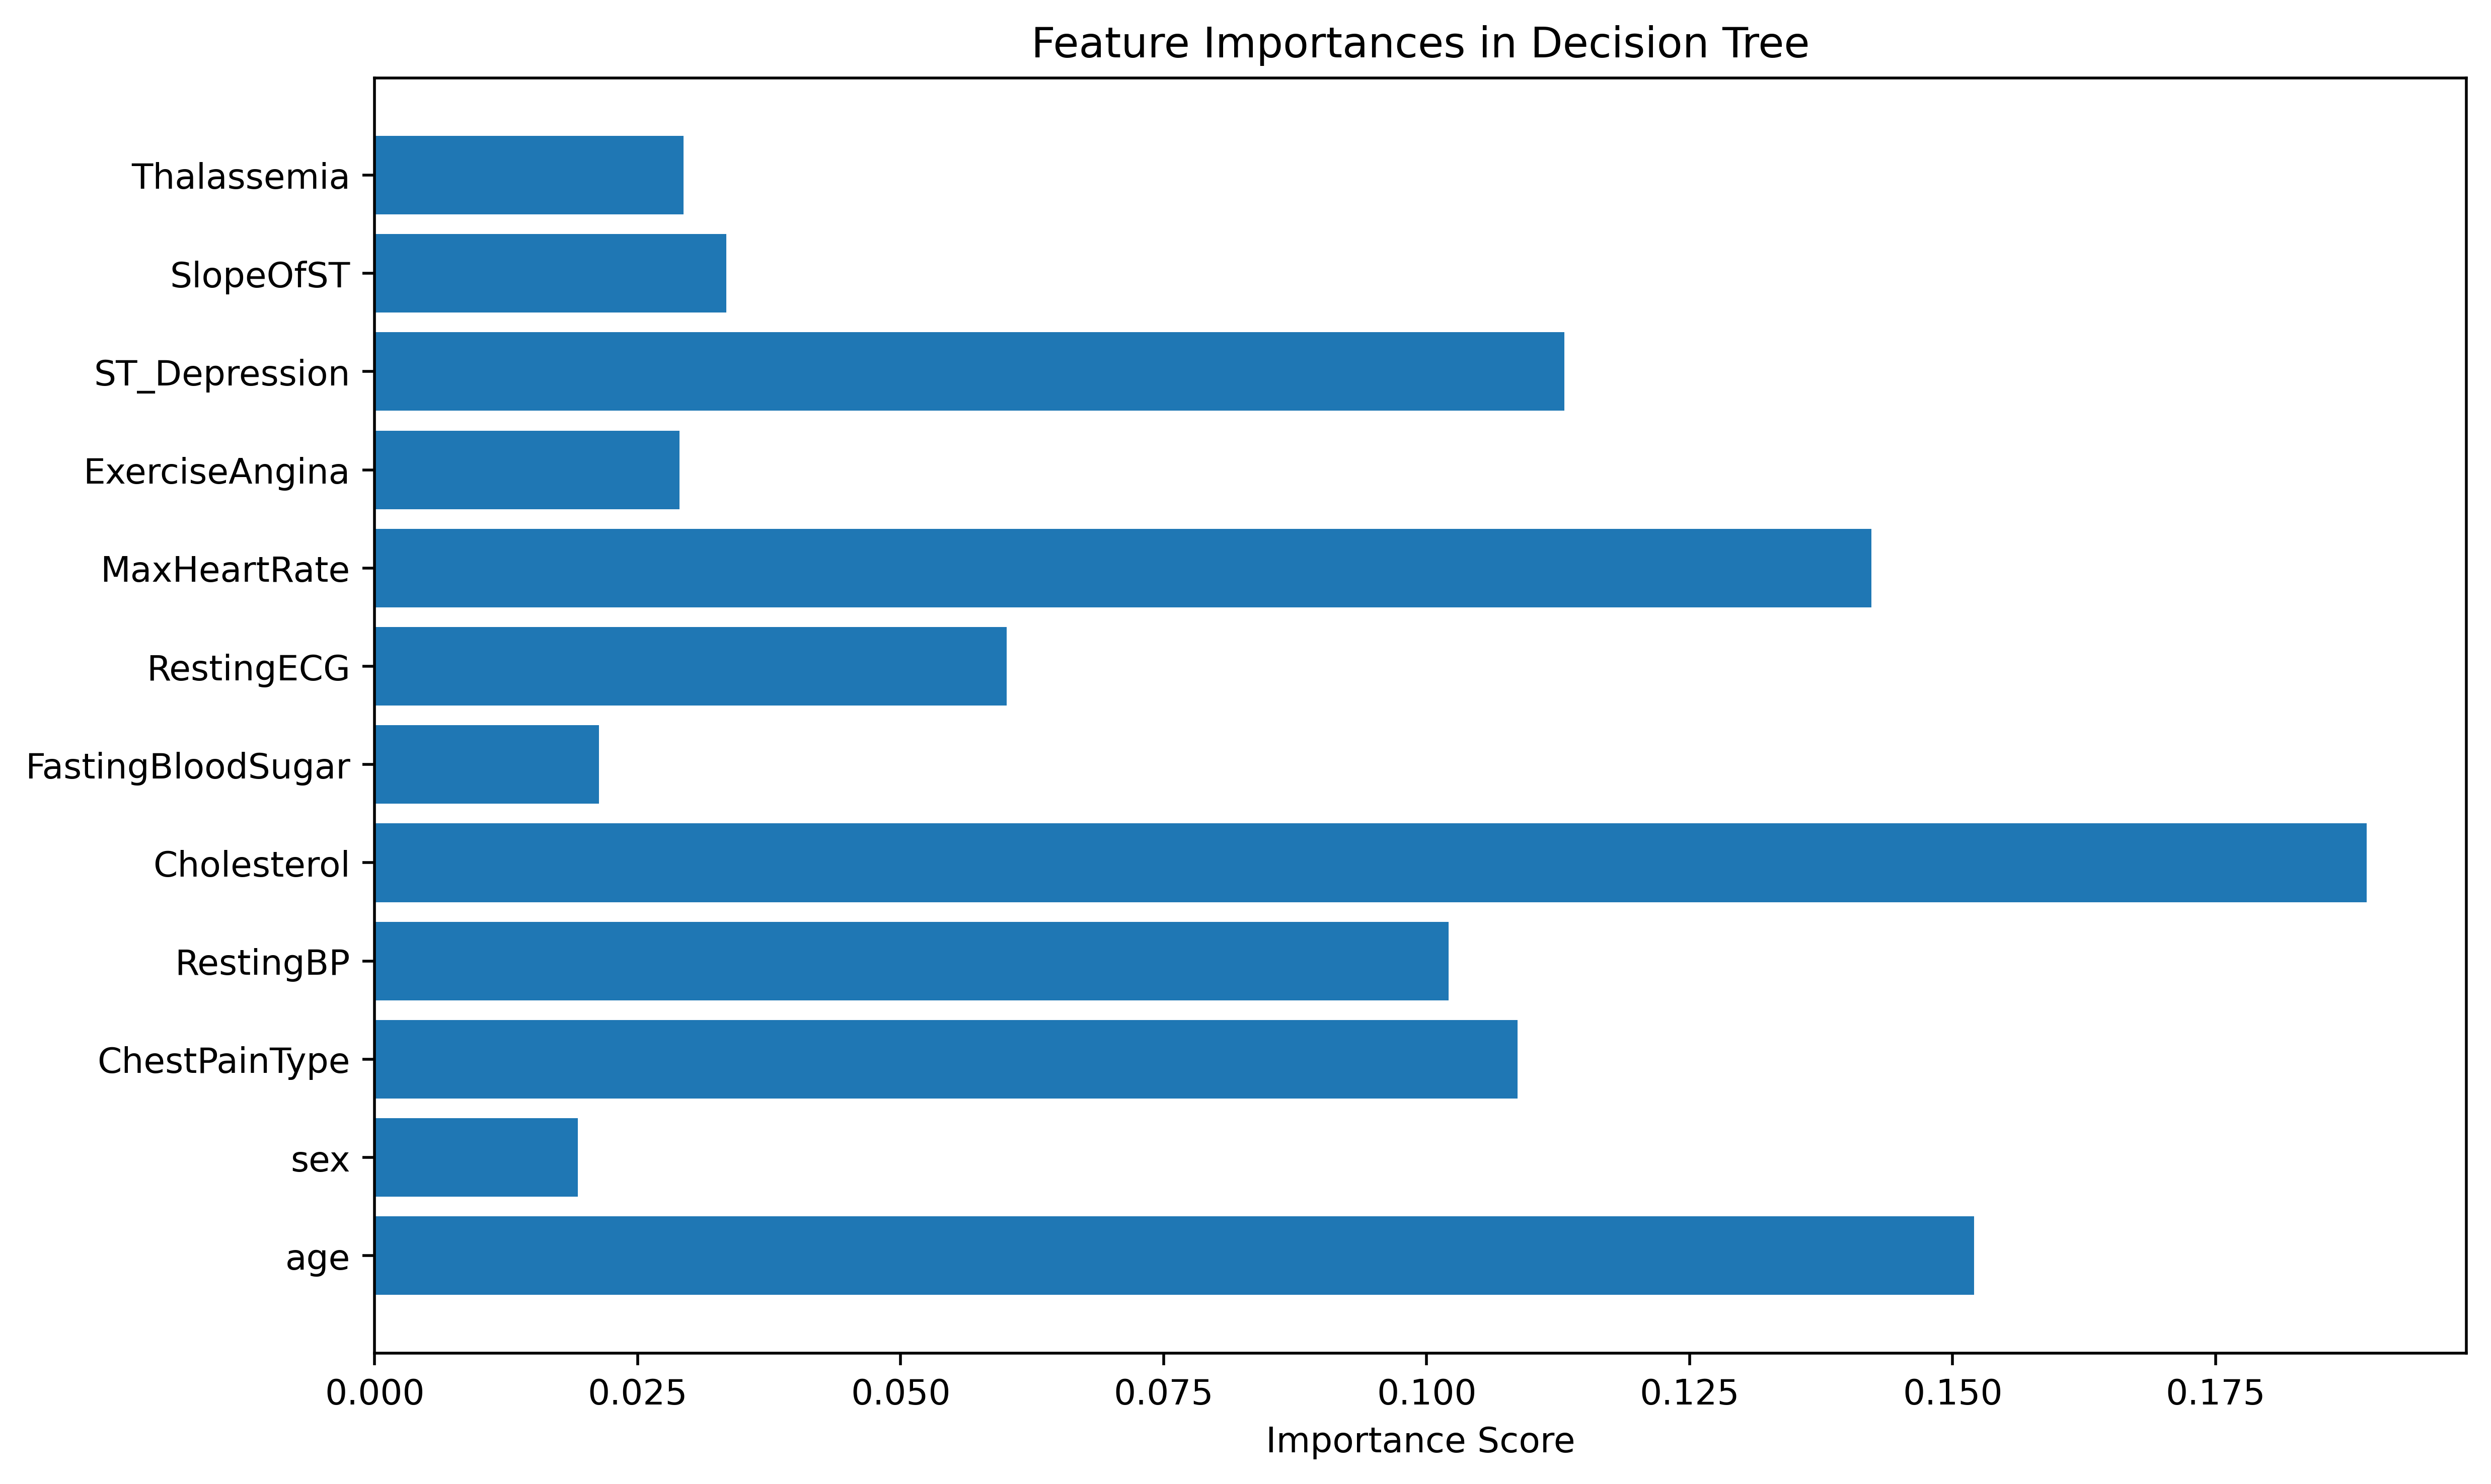

In [51]:
plt.figure(figsize=(10, 6))
plt.barh(X.columns, model.feature_importances_)
plt.xlabel("Importance Score")
plt.title("Feature Importances in Decision Tree")
plt.tight_layout()
plt.show()

# Model 02

# CART (Classification)

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
params = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'criterion': ['gini', 'entropy'],
    'splitter' :['best','random']
}

In [54]:
grid = GridSearchCV(DecisionTreeClassifier(), params, cv=5)

In [55]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [56]:
print("Best parameters:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 10, 'splitter': 'random'}
Best CV accuracy: 0.5867453944260748


In [72]:
model2 = DecisionTreeClassifier(criterion='gini', max_depth=3, splitter='random')
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, splitter='random')

In [73]:
y_pred2 = model2.predict(X_test)

In [74]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.68      0.90      0.77        89
           1       0.39      0.52      0.45        48
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00         6

    accuracy                           0.58       182
   macro avg       0.21      0.28      0.24       182
weighted avg       0.43      0.58      0.50       182



In [75]:
print('Training accuracy: ', model2.score(X_train,y_train))
print('Testing Accuracy: ', model2.score(X_test,y_test))

Training accuracy:  0.5674931129476584
Testing Accuracy:  0.5769230769230769


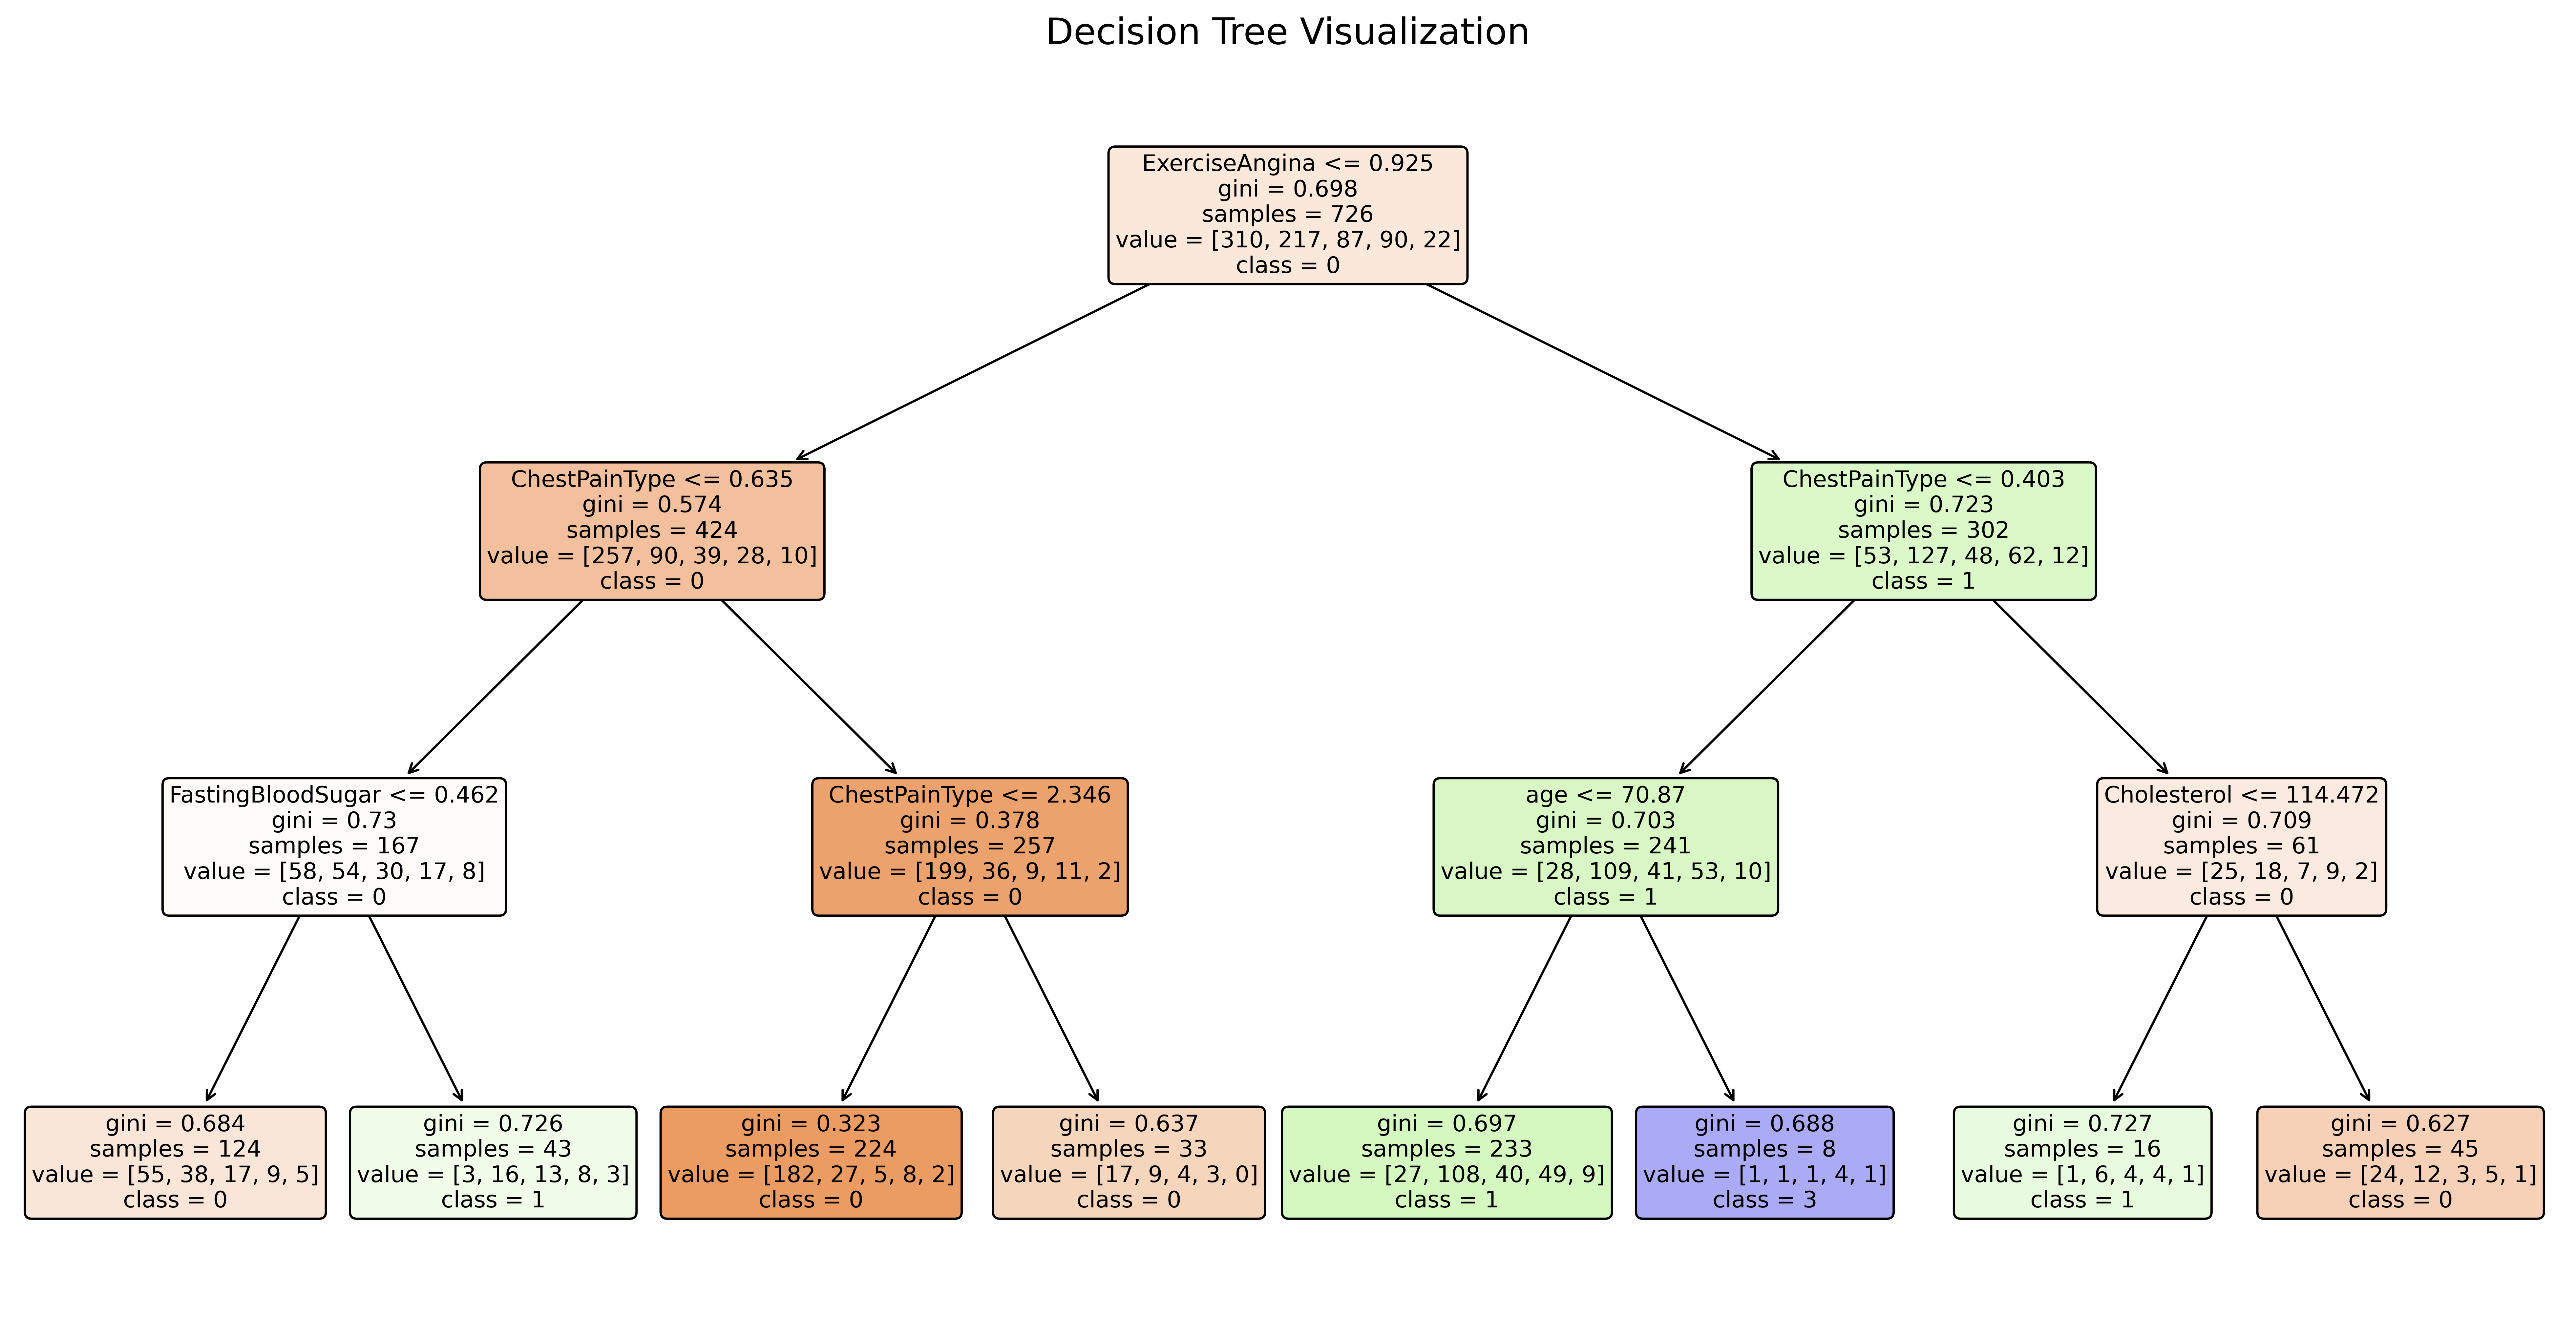

In [76]:
plt.figure(figsize=(20, 10))
plot_tree(model2,
          feature_names=X.columns,
          class_names=[str(cls) for cls in model2.classes_], 
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()

# Model 03

# CART (Regression)

In [77]:
from sklearn.tree import DecisionTreeRegressor

In [78]:
model3 = DecisionTreeRegressor()

In [79]:
model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)
y_pred3

array([0., 3., 0., 2., 0., 2., 0., 0., 2., 2., 3., 0., 0., 0., 2., 2., 0.,
       0., 0., 2., 0., 0., 1., 1., 0., 3., 0., 0., 1., 0., 2., 2., 0., 1.,
       0., 1., 1., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       2., 0., 3., 0., 0., 1., 0., 3., 0., 1., 1., 0., 1., 0., 1., 3., 0.,
       1., 2., 0., 3., 3., 3., 0., 0., 1., 0., 3., 0., 1., 1., 1., 0., 0.,
       0., 0., 3., 3., 3., 1., 2., 0., 0., 0., 2., 4., 0., 0., 0., 0., 1.,
       0., 0., 0., 3., 3., 1., 0., 2., 2., 0., 1., 1., 0., 2., 1., 1., 3.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 4., 1., 1., 0., 2., 1., 1., 0.,
       0., 0., 2., 0., 2., 0., 0., 0., 3., 1., 0., 0., 2., 0., 0., 0., 0.,
       0., 0., 1., 2., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 3., 3., 0.,
       0., 1., 0., 0., 0., 3., 3., 1., 0., 3., 3., 0.])

In [81]:
model3.score(X_train,y_train), model3.score(X_test,y_test)

(1.0, -0.16066475427325067)

In [82]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71        89
           1       0.38      0.31      0.34        48
           2       0.23      0.23      0.23        22
           3       0.13      0.18      0.15        17
           4       0.00      0.00      0.00         6

    accuracy                           0.49       182
   macro avg       0.29      0.29      0.29       182
weighted avg       0.48      0.49      0.48       182



# Model 04 

# Chechking model by removing least imp features

In [83]:
# Keep top important features 
feat_imp = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)
selected_features = feat_imp[feat_imp['Importance'] > 0.030]['Feature']

In [84]:
selected_features

4       Cholesterol
0               age
7      MaxHeartRate
9     ST_Depression
2     ChestPainType
3         RestingBP
6        RestingECG
10        SlopeOfST
Name: Feature, dtype: object

In [85]:
X_selected = X[selected_features]

In [86]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [98]:
model4 = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
model4.fit(X_train2, y_train2)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [99]:
y_pred4 = model4.predict(X_test2)

In [100]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy with selected features:", accuracy_score(y_test2, y_pred4))
print(classification_report(y_test2, y_pred4))

Accuracy with selected features: 0.5934065934065934
              precision    recall  f1-score   support

           0       0.75      0.85      0.80        89
           1       0.51      0.52      0.52        48
           2       0.33      0.14      0.19        22
           3       0.17      0.24      0.20        17
           4       0.00      0.00      0.00         6

    accuracy                           0.59       182
   macro avg       0.35      0.35      0.34       182
weighted avg       0.56      0.59      0.57       182



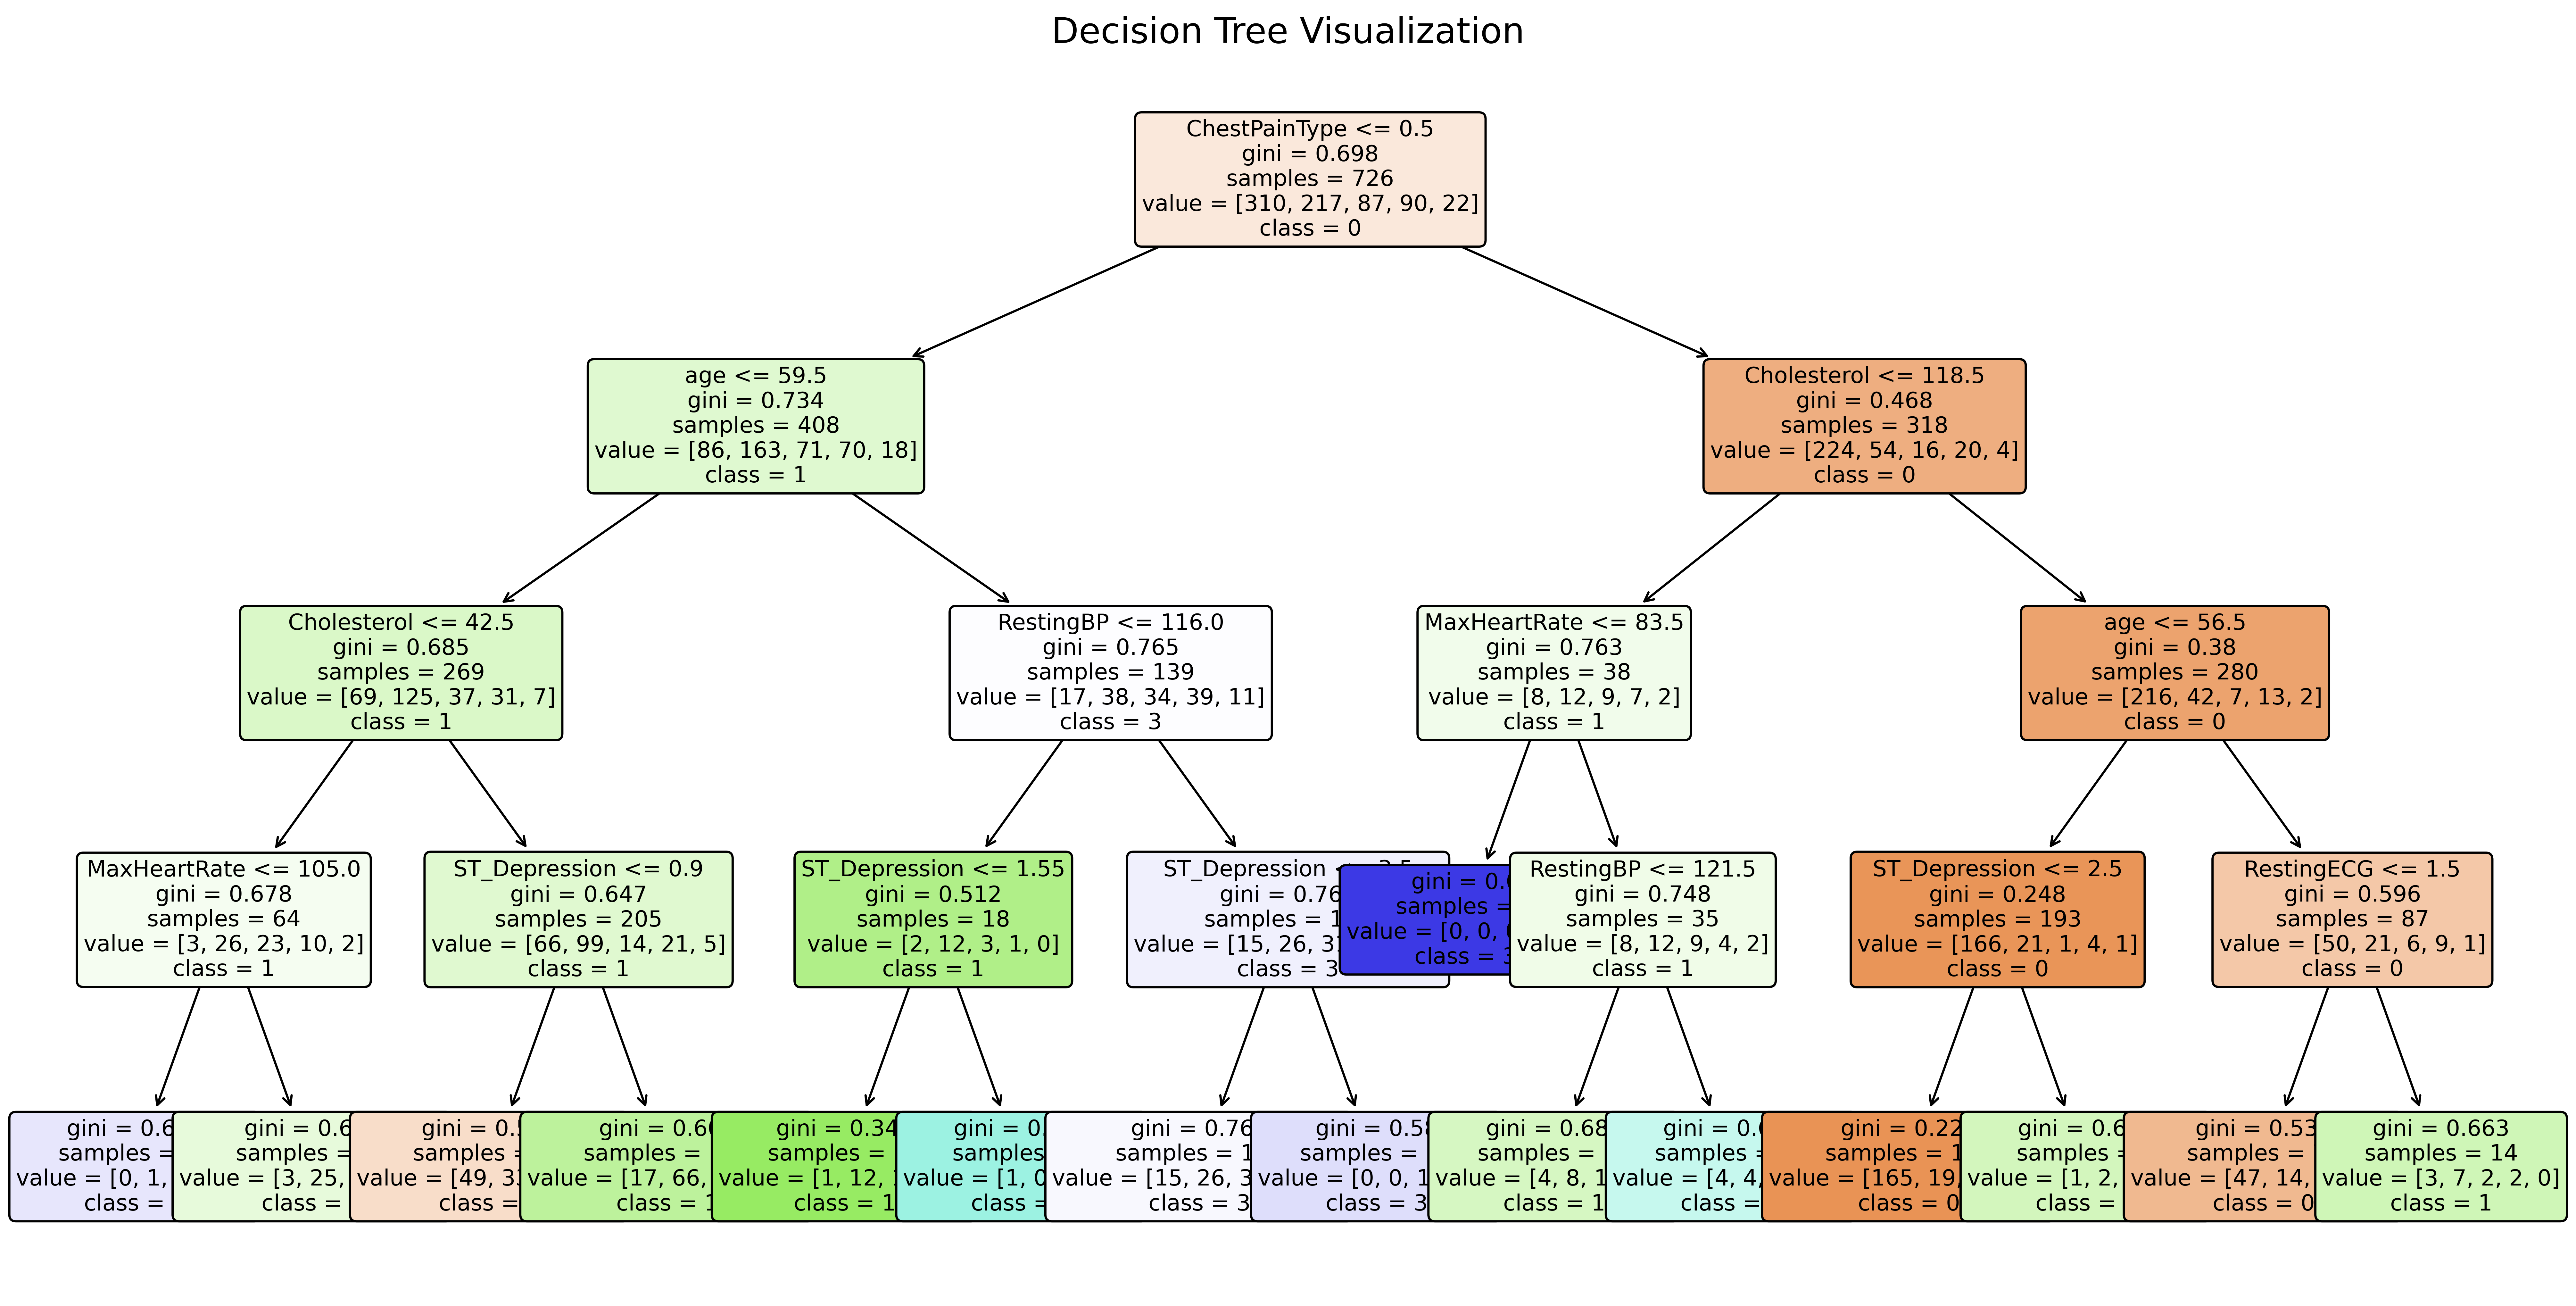

In [102]:
plt.figure(figsize=(20, 10))
plot_tree(model4,
          feature_names=X_selected.columns,
          class_names=[str(cls) for cls in model4.classes_],  
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()

# Model 05

# Trying OneHotEncoding on DataSet instead of LabelEncoding

In [103]:
df.head()

age   sex    ChestPainType  RestingBP  Cholesterol  FastingBloodSugar  \
0   63  Male   typical angina        145        233.0               True   
1   41  Male  atypical angina        135        203.0              False   
2   57  Male     asymptomatic        140        192.0              False   
3   52  Male   typical angina        118        186.0              False   
4   57  Male     asymptomatic        110        201.0              False   

       RestingECG  MaxHeartRate ExerciseAngina  ST_Depression    SlopeOfST  \
0  lv hypertrophy           150          FALSE            2.3  downsloping   
1          normal           132          FALSE            0.0         flat   
2          normal           148          FALSE            0.4         flat   
3  lv hypertrophy           190          FALSE            0.0         flat   
4          normal           126           TRUE            1.5         flat   

    Thalassemia  HeartDisease  
0  fixed defect             0  
1  fixed defect             0  
2  fixed defect             0  
3  fixed defect             0  
4  fixed defect             0

In [104]:
# One-Hot Encoding of categorical columns
df_encoded2 = pd.get_dummies(df, drop_first=True)

In [105]:
df_encoded2.head()

age  RestingBP  Cholesterol  FastingBloodSugar  MaxHeartRate  \
0   63        145        233.0               True           150   
1   41        135        203.0              False           132   
2   57        140        192.0              False           148   
3   52        118        186.0              False           190   
4   57        110        201.0              False           126   

   ST_Depression  HeartDisease  sex_Male  ChestPainType_atypical angina  \
0            2.3             0         1                              0   
1            0.0             0         1                              1   
2            0.4             0         1                              0   
3            0.0             0         1                              0   
4            1.5             0         1                              0   

   ChestPainType_non-anginal  ChestPainType_typical angina  RestingECG_normal  \
0                          0                             1                  0   
1                          0                             0                  1   
2                          0                             0                  1   
3                          0                             1                  0   
4                          0                             0                  1   

   RestingECG_st-t abnormality  ExerciseAngina_TRUE  ExerciseAngina_TURE  \
0                            0                    0                    0   
1                            0                    0                    0   
2                            0                    0                    0   
3                            0                    0                    0   
4                            0                    1                    0   

   SlopeOfST_flat  SlopeOfST_upsloping  Thalassemia_normal  \
0               0                    0                   0   
1               1                    0                   0   
2               1                    0                   0   
3               1                    0                   0   
4               1                    0                   0   

   Thalassemia_reversable defect  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0

In [106]:
# Features and target
X_OHE = df_encoded2.drop('HeartDisease', axis=1)
y_OHE = df_encoded2['HeartDisease']

In [107]:
X_OHE.head()

age  RestingBP  Cholesterol  FastingBloodSugar  MaxHeartRate  \
0   63        145        233.0               True           150   
1   41        135        203.0              False           132   
2   57        140        192.0              False           148   
3   52        118        186.0              False           190   
4   57        110        201.0              False           126   

   ST_Depression  sex_Male  ChestPainType_atypical angina  \
0            2.3         1                              0   
1            0.0         1                              1   
2            0.4         1                              0   
3            0.0         1                              0   
4            1.5         1                              0   

   ChestPainType_non-anginal  ChestPainType_typical angina  RestingECG_normal  \
0                          0                             1                  0   
1                          0                             0                  1   
2                          0                             0                  1   
3                          0                             1                  0   
4                          0                             0                  1   

   RestingECG_st-t abnormality  ExerciseAngina_TRUE  ExerciseAngina_TURE  \
0                            0                    0                    0   
1                            0                    0                    0   
2                            0                    0                    0   
3                            0                    0                    0   
4                            0                    1                    0   

   SlopeOfST_flat  SlopeOfST_upsloping  Thalassemia_normal  \
0               0                    0                   0   
1               1                    0                   0   
2               1                    0                   0   
3               1                    0                   0   
4               1                    0                   0   

   Thalassemia_reversable defect  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0

In [108]:
y_OHE.head()

0    0
1    0
2    0
3    0
4    0
Name: HeartDisease, dtype: int64

In [109]:
# Train-test split
X_train_OHE, X_test_OHE, y_train_OHE, y_test_OHE = train_test_split(X_OHE, y_OHE, test_size=0.2, random_state=42)

In [110]:
# Train the Decision Tree
model_OHE = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
model_OHE.fit(X_train_OHE, y_train_OHE)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [112]:
# Predict and evaluate
y_pred_OHE = model_OHE.predict(X_test_OHE)

In [113]:
print(classification_report(y_test_OHE,y_pred_OHE))

              precision    recall  f1-score   support

           0       0.68      0.84      0.75        89
           1       0.37      0.46      0.41        48
           2       0.00      0.00      0.00        22
           3       0.20      0.12      0.15        17
           4       0.00      0.00      0.00         6

    accuracy                           0.54       182
   macro avg       0.25      0.28      0.26       182
weighted avg       0.45      0.54      0.49       182



In [114]:
print('Training accuracy: ', model_OHE.score(X_train_OHE,y_train_OHE))
print('Testing Accuracy: ', model_OHE.score(X_test_OHE,y_test_OHE))

Training accuracy:  0.6101928374655647
Testing Accuracy:  0.5439560439560439


In [ ]:
from sklearn.metrics import accuracy_score

In [115]:
print("Accuracy:", accuracy_score(y_test_OHE, y_pred_OHE))
print("Confusion Matrix:\n", confusion_matrix(y_test_OHE, y_pred_OHE))
print("Classification Report:\n", classification_report(y_test_OHE, y_pred_OHE))

Accuracy: 0.5439560439560439
Confusion Matrix:
 [[75 13  1  0  0]
 [23 22  0  3  0]
 [ 5 12  0  5  0]
 [ 6  9  0  2  0]
 [ 2  4  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.84      0.75        89
           1       0.37      0.46      0.41        48
           2       0.00      0.00      0.00        22
           3       0.20      0.12      0.15        17
           4       0.00      0.00      0.00         6

    accuracy                           0.54       182
   macro avg       0.25      0.28      0.26       182
weighted avg       0.45      0.54      0.49       182



# Model 06

In [116]:
model6 = DecisionTreeRegressor()

In [118]:
model6.fit(X_train_OHE,y_train_OHE)
y_pred6 = model6.predict(X_test_OHE)
y_pred6

array([1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 3., 1., 0., 0., 0., 2., 0.,
       0., 0., 1., 0., 1., 1., 1., 0., 2., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 3., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 3., 1.,
       2., 0., 2., 0., 0., 1., 0., 1., 3., 1., 3., 1., 0., 3., 1., 3., 1.,
       0., 0., 0., 3., 2., 1., 0., 0., 3., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 3., 0., 2., 3., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       3., 3., 0., 0., 1., 3., 1., 1., 0., 0., 2., 3., 0., 2., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 2., 0., 0., 1., 2., 2., 0.,
       0., 0., 3., 0., 1., 0., 0., 3., 0., 0., 2., 0., 1., 0., 2., 0., 0.,
       2., 1., 1., 1., 0., 0., 0., 1., 3., 0., 0., 0., 1., 2., 1., 2., 1.,
       0., 2., 0., 2., 0., 3., 1., 1., 2., 3., 1., 0.])

In [124]:
print(classification_report(y_test_OHE, y_pred_OHE))

              precision    recall  f1-score   support

           0       0.68      0.84      0.75        89
           1       0.37      0.46      0.41        48
           2       0.00      0.00      0.00        22
           3       0.20      0.12      0.15        17
           4       0.00      0.00      0.00         6

    accuracy                           0.54       182
   macro avg       0.25      0.28      0.26       182
weighted avg       0.45      0.54      0.49       182



In this assignment, I explored various approaches using the Decision Tree algorithm to predict heart disease. A total of six different models were built using techniques like label encoding, one-hot encoding, feature selection, and hyperparameter tuning. Among these, the model trained after removing the least important features (based on feature importance scores) performed the best. This highlights the importance of selecting relevant features to improve model performance and generalization.

# Interview Questions
## 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
### Ans: Decision Tree models have several hyperparameters that control their structure and influence model performance:
### max_depth, min_samples_split, criterion, min_samples_leaf, etc.
## 2. What is the difference between the Label encoding and One-hot encoding?
### Ans: Label Encoding converts categorical values into numeric labels by assigning each unique category a number, which can unintentionally imply an ordinal relationship. One-Hot Encoding creates separate binary columns for each category, avoiding any implied order and making it more suitable for nominal data.